In [1]:
import sys
sys.path.append('../')

import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
from helpers_mom6.collection_of_experiments import CollectionOfExperiments
from helpers.plot_helpers import *
from helpers_mom6.computational_tools import remesh, select_LatLon, Lk_error, x_coord, y_coord, gaussian_remesh
from mpl_toolkits.axes_grid1 import make_axes_locatable
import cmocean
import os

%load_ext autoreload
%autoreload 2
import warnings
warnings.filterwarnings("ignore")
import hvplot.xarray
import hvplot
hvplot.output(widget_location='bottom')

In [2]:
ds = CollectionOfExperiments.init_folder('/scratch/pp2681/mom6/Feb2022/bare', additional_subfolder='output')

In [3]:
directory = "/scratch/pp2681/mom6/Apr2023/generalization"
for name in os.listdir(directory):
    ds += CollectionOfExperiments.init_folder(os.path.join(directory,name), additional_subfolder='output', prefix=name)

In [4]:
ds += CollectionOfExperiments.init_folder('/scratch/pp2681/mom6/Apr2023/GZ21_results', additional_subfolder='')

In [5]:
directory = "/scratch/pp2681/mom6/CM26_Double_Gyre/generalization"
for name in os.listdir(directory):
    ds += CollectionOfExperiments.init_folder(os.path.join(directory,name), additional_subfolder='output', prefix=name)

Error, cannot find files in folder/scratch/pp2681/mom6/CM26_Double_Gyre/generalization/ANN_CM26_grid_harmonic_ver3-R4/ZB-1.0-FCT-3-test/output


In [6]:
len(ds.exps)

1887

In [7]:
for exp in ['R2', 'R3', 'R4', 'R5', 'R6', 'R7', 'R8']:
    ds.remesh('R64', exp)

Experiment R64 coarsegrained to R2 is created. Its identificator=R64_R2
Experiment R64 coarsegrained to R3 is created. Its identificator=R64_R3
Experiment R64 coarsegrained to R4 is created. Its identificator=R64_R4
Experiment R64 coarsegrained to R5 is created. Its identificator=R64_R5
Experiment R64 coarsegrained to R6 is created. Its identificator=R64_R6
Experiment R64 coarsegrained to R7 is created. Its identificator=R64_R7
Experiment R64 coarsegrained to R8 is created. Its identificator=R64_R8


In [18]:
def ssh_error_map(exp='EXP1', subfilter='subfilter', suffix=''):
    ssh_error = np.zeros((7,4,3)) # 7 resolutions, 4 FGRs and 3 Smagorinsky coefficients
    for i, res in enumerate([2,3,4,5,6,7,8]):
        for j, FGR in enumerate([1,2,3,4]):
            for k, Cs in enumerate([0.01,0.03,0.06]):
                key = f'May22-FGR{FGR}-{subfilter}-{exp}-R{res}-ZB-1.0-Cs-{Cs}{suffix}'
                try:
                    ssh_error[i,j,k] = Lk_error(ds[key].ssh_mean, ds[f'R64_R{res}'].ssh_mean)[0]
                except:
                    print(key+' exploded')
                    ssh_error[i,j,k] = np.nan
    return ssh_error

In [9]:
exp1_subfilter = ssh_error_map()

In [10]:
exp2_subfilter = ssh_error_map('EXP2')

In [11]:
exp1_subgrid = ssh_error_map('EXP1', 'subgrid')

In [12]:
exp2_subgrid = ssh_error_map('EXP2', 'subgrid')

May22-FGR4-subgrid-EXP2-R6-ZB-1.0-Cs-0.01 exploded
May22-FGR4-subgrid-EXP2-R7-ZB-1.0-Cs-0.01 exploded
May22-FGR4-subgrid-EXP2-R8-ZB-1.0-Cs-0.01 exploded


In [13]:
exp1_short_zero_subfilter = ssh_error_map('EXP1-short-zero', 'subfilter')

In [14]:
exp2_short_zero_subfilter = ssh_error_map('EXP2-short-zero', 'subfilter')

In [15]:
exp1_short_zero_subgrid = ssh_error_map('EXP1-short-zero', 'subgrid')

In [16]:
exp2_short_zero_subgrid = ssh_error_map('EXP2-short-zero', 'subgrid')

In [19]:
exp1_subfilter_smooth_1 = ssh_error_map('EXP1', 'subfilter', '-smooth-1')

May22-FGR4-subfilter-EXP1-R2-ZB-1.0-Cs-0.01-smooth-1 exploded
May22-FGR4-subfilter-EXP1-R3-ZB-1.0-Cs-0.01-smooth-1 exploded
May22-FGR4-subfilter-EXP1-R4-ZB-1.0-Cs-0.01-smooth-1 exploded
May22-FGR4-subfilter-EXP1-R4-ZB-1.0-Cs-0.03-smooth-1 exploded
May22-FGR4-subfilter-EXP1-R5-ZB-1.0-Cs-0.01-smooth-1 exploded
May22-FGR4-subfilter-EXP1-R5-ZB-1.0-Cs-0.03-smooth-1 exploded
May22-FGR4-subfilter-EXP1-R6-ZB-1.0-Cs-0.01-smooth-1 exploded
May22-FGR4-subfilter-EXP1-R6-ZB-1.0-Cs-0.03-smooth-1 exploded
May22-FGR4-subfilter-EXP1-R7-ZB-1.0-Cs-0.01-smooth-1 exploded
May22-FGR4-subfilter-EXP1-R7-ZB-1.0-Cs-0.03-smooth-1 exploded
May22-FGR3-subfilter-EXP1-R8-ZB-1.0-Cs-0.01-smooth-1 exploded
May22-FGR4-subfilter-EXP1-R8-ZB-1.0-Cs-0.01-smooth-1 exploded
May22-FGR4-subfilter-EXP1-R8-ZB-1.0-Cs-0.03-smooth-1 exploded


In [20]:
exp1_subfilter_smooth_4 = ssh_error_map('EXP1', 'subfilter', '-smooth-4')

May22-FGR4-subfilter-EXP1-R2-ZB-1.0-Cs-0.01-smooth-4 exploded
May22-FGR4-subfilter-EXP1-R3-ZB-1.0-Cs-0.01-smooth-4 exploded
May22-FGR4-subfilter-EXP1-R3-ZB-1.0-Cs-0.03-smooth-4 exploded
May22-FGR4-subfilter-EXP1-R4-ZB-1.0-Cs-0.01-smooth-4 exploded
May22-FGR4-subfilter-EXP1-R4-ZB-1.0-Cs-0.03-smooth-4 exploded
May22-FGR4-subfilter-EXP1-R5-ZB-1.0-Cs-0.01-smooth-4 exploded
May22-FGR4-subfilter-EXP1-R5-ZB-1.0-Cs-0.03-smooth-4 exploded
May22-FGR4-subfilter-EXP1-R6-ZB-1.0-Cs-0.01-smooth-4 exploded
May22-FGR4-subfilter-EXP1-R6-ZB-1.0-Cs-0.03-smooth-4 exploded
May22-FGR4-subfilter-EXP1-R7-ZB-1.0-Cs-0.01-smooth-4 exploded
May22-FGR4-subfilter-EXP1-R7-ZB-1.0-Cs-0.03-smooth-4 exploded
May22-FGR4-subfilter-EXP1-R8-ZB-1.0-Cs-0.01-smooth-4 exploded
May22-FGR4-subfilter-EXP1-R8-ZB-1.0-Cs-0.03-smooth-4 exploded


In [21]:
exp2_subfilter_smooth_1 = ssh_error_map('EXP2', 'subfilter', '-smooth-1')

May22-FGR4-subfilter-EXP2-R3-ZB-1.0-Cs-0.01-smooth-1 exploded
May22-FGR4-subfilter-EXP2-R4-ZB-1.0-Cs-0.01-smooth-1 exploded
May22-FGR4-subfilter-EXP2-R4-ZB-1.0-Cs-0.03-smooth-1 exploded
May22-FGR4-subfilter-EXP2-R5-ZB-1.0-Cs-0.01-smooth-1 exploded
May22-FGR4-subfilter-EXP2-R5-ZB-1.0-Cs-0.03-smooth-1 exploded
May22-FGR4-subfilter-EXP2-R6-ZB-1.0-Cs-0.01-smooth-1 exploded
May22-FGR4-subfilter-EXP2-R6-ZB-1.0-Cs-0.03-smooth-1 exploded
May22-FGR4-subfilter-EXP2-R7-ZB-1.0-Cs-0.01-smooth-1 exploded
May22-FGR4-subfilter-EXP2-R7-ZB-1.0-Cs-0.03-smooth-1 exploded
May22-FGR4-subfilter-EXP2-R8-ZB-1.0-Cs-0.01-smooth-1 exploded
May22-FGR4-subfilter-EXP2-R8-ZB-1.0-Cs-0.03-smooth-1 exploded


In [22]:
exp2_subfilter_smooth_4 = ssh_error_map('EXP2', 'subfilter', '-smooth-4')

May22-FGR4-subfilter-EXP2-R2-ZB-1.0-Cs-0.01-smooth-4 exploded
May22-FGR4-subfilter-EXP2-R3-ZB-1.0-Cs-0.01-smooth-4 exploded
May22-FGR4-subfilter-EXP2-R4-ZB-1.0-Cs-0.01-smooth-4 exploded
May22-FGR4-subfilter-EXP2-R4-ZB-1.0-Cs-0.03-smooth-4 exploded
May22-FGR4-subfilter-EXP2-R5-ZB-1.0-Cs-0.01-smooth-4 exploded
May22-FGR4-subfilter-EXP2-R5-ZB-1.0-Cs-0.03-smooth-4 exploded
May22-FGR4-subfilter-EXP2-R6-ZB-1.0-Cs-0.01-smooth-4 exploded
May22-FGR4-subfilter-EXP2-R6-ZB-1.0-Cs-0.03-smooth-4 exploded
May22-FGR4-subfilter-EXP2-R7-ZB-1.0-Cs-0.01-smooth-4 exploded
May22-FGR4-subfilter-EXP2-R7-ZB-1.0-Cs-0.03-smooth-4 exploded
May22-FGR4-subfilter-EXP2-R8-ZB-1.0-Cs-0.01-smooth-4 exploded
May22-FGR4-subfilter-EXP2-R8-ZB-1.0-Cs-0.03-smooth-4 exploded


In [59]:
np.median(np.array([Lk_error(ds[f'R{res}'].ssh_mean, ds[f'R64_R{res}'].ssh_mean)[0] for res in [2,3,4,5,6,7,8]]))

0.18176746

In [63]:
np.median(np.array([Lk_error(ds[f'May16-EXP3-R{res}-ZB-1.0-Cs-0.01'].ssh_mean, ds[f'R64_R{res}'].ssh_mean)[0] for res in [2,3,4,5,6,7,8]]))

0.096532255

[[0.10592028 0.12914301 0.16749726]
 [0.12896168 0.10006939 0.16402502]
 [0.1691232  0.12887512 0.10977293]
 [0.20896243 0.19292311 0.15852648]]
[[0.10638905 0.13767555 0.18469059]
 [0.153781   0.1136435  0.13981967]
 [0.18582256 0.12919508 0.12487454]
 [0.20680007 0.20815682 0.19437231]]


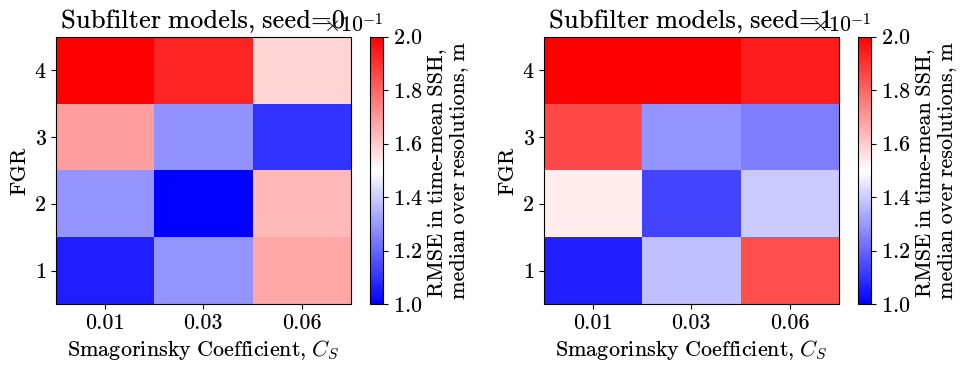

In [54]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
x = np.median(exp1_subfilter,0)
print(x)
plt.pcolormesh(x, cmap='bwr', clim=(0.1,0.2))
plt.xticks([0.5,1.5,2.5],[0.01,0.03,0.06])
plt.yticks([0.5,1.5,2.5,3.5],[1,2,3,4])
plt.colorbar(label='RMSE in time-mean SSH, \nmedian over resolutions, m')
plt.title('Subfilter models, seed=0')
plt.xlabel('Smagorinsky Coefficient, $C_S$')
plt.ylabel('FGR')

plt.subplot(1,2,2)
x = np.median(exp2_subfilter,0)
print(x)
plt.pcolormesh(x, cmap='bwr', clim=(0.1,0.2))
plt.xticks([0.5,1.5,2.5],[0.01,0.03,0.06])
plt.yticks([0.5,1.5,2.5,3.5],[1,2,3,4])
plt.colorbar(label='RMSE in time-mean SSH, \nmedian over resolutions, m')
plt.title('Subfilter models, seed=1')
plt.xlabel('Smagorinsky Coefficient, $C_S$')
plt.ylabel('FGR')
plt.tight_layout()

[[0.09758537 0.11337658 0.1621618 ]
 [0.10248989 0.15309659 0.18319452]
 [0.18847916 0.14820898 0.19581357]
 [0.21236452 0.20072193 0.171911  ]]
[[0.1245808  0.16304384 0.17067041]
 [0.11709083 0.13771597 0.17796253]
 [0.19773018 0.14030343 0.10576285]
 [       nan 0.20433362 0.18297574]]


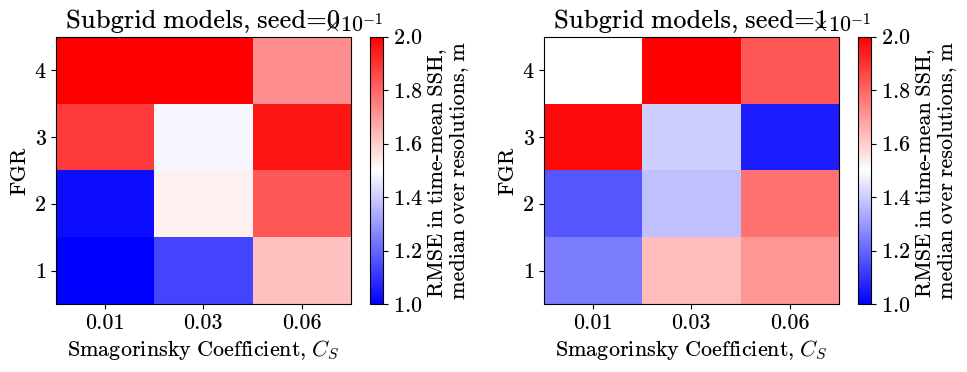

In [55]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
x = np.median(exp1_subgrid,0)
print(x)
plt.pcolormesh(x, cmap='bwr', clim=(0.1,0.2))
plt.xticks([0.5,1.5,2.5],[0.01,0.03,0.06])
plt.yticks([0.5,1.5,2.5,3.5],[1,2,3,4])
plt.colorbar(label='RMSE in time-mean SSH, \nmedian over resolutions, m')
plt.title('Subgrid models, seed=0')
plt.xlabel('Smagorinsky Coefficient, $C_S$')
plt.ylabel('FGR')

plt.subplot(1,2,2)
x = np.median(exp2_subgrid,0)
print(x)
plt.pcolormesh(x, cmap='bwr', clim=(0.1,0.2))
plt.xticks([0.5,1.5,2.5],[0.01,0.03,0.06])
plt.yticks([0.5,1.5,2.5,3.5],[1,2,3,4])
plt.colorbar(label='RMSE in time-mean SSH, \nmedian over resolutions, m')
plt.title('Subgrid models, seed=1')
plt.xlabel('Smagorinsky Coefficient, $C_S$')
plt.ylabel('FGR')
plt.tight_layout()

# Short zero experiments

[[0.11272927 0.13443099 0.20552394]
 [0.09898595 0.11323567 0.14596488]
 [0.15394363 0.12744622 0.08993489]
 [0.20983224 0.1935928  0.16301797]]
[[0.10831787 0.11806918 0.15195537]
 [0.11292981 0.10806499 0.13398027]
 [0.15351351 0.09217505 0.10914583]
 [0.19590934 0.18029968 0.1627948 ]]


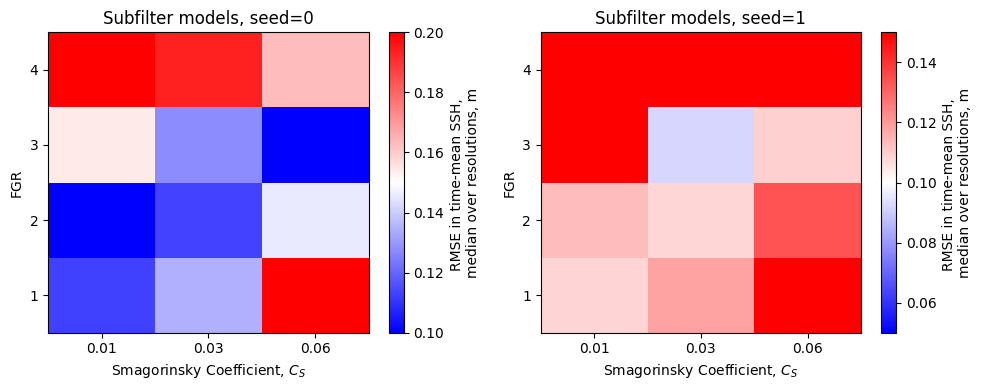

In [23]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
x = np.median(exp1_short_zero_subfilter,0)
print(x)
plt.pcolormesh(x, cmap='bwr', clim=(0.1,0.2))
plt.xticks([0.5,1.5,2.5],[0.01,0.03,0.06])
plt.yticks([0.5,1.5,2.5,3.5],[1,2,3,4])
plt.colorbar(label='RMSE in time-mean SSH, \nmedian over resolutions, m')
plt.title('Subfilter models, seed=0')
plt.xlabel('Smagorinsky Coefficient, $C_S$')
plt.ylabel('FGR')

plt.subplot(1,2,2)
x = np.median(exp2_short_zero_subfilter,0)
print(x)
plt.pcolormesh(x, cmap='bwr', clim=(0.05,0.15))
plt.xticks([0.5,1.5,2.5],[0.01,0.03,0.06])
plt.yticks([0.5,1.5,2.5,3.5],[1,2,3,4])
plt.colorbar(label='RMSE in time-mean SSH, \nmedian over resolutions, m')
plt.title('Subfilter models, seed=1')
plt.xlabel('Smagorinsky Coefficient, $C_S$')
plt.ylabel('FGR')
plt.tight_layout()

[[0.09946443 0.11181875 0.15094872]
 [0.08066165 0.12346898 0.1725771 ]
 [0.15534568 0.09127089 0.10367627]
 [0.19851556 0.17971995 0.13642804]]
[[0.08936772 0.13477755 0.17722596]
 [0.09678763 0.13169844 0.17812806]
 [0.12603451 0.08831791 0.1138248 ]
 [0.20902859 0.18119159 0.13614801]]


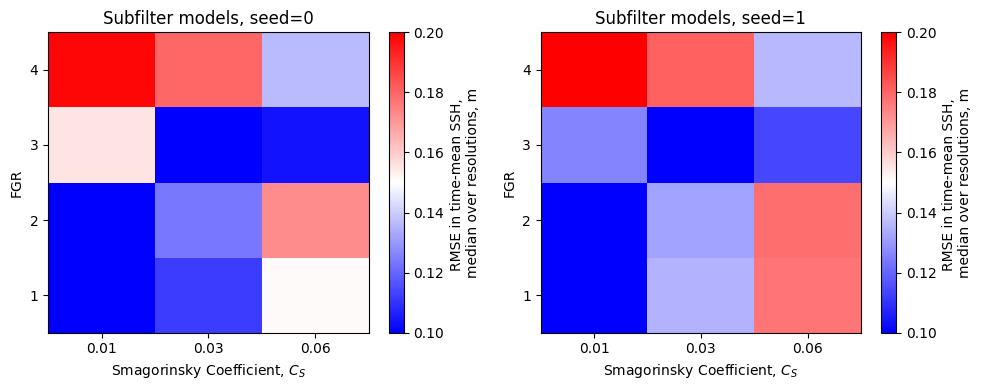

In [53]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
x = np.median(exp1_short_zero_subgrid,0)
print(x)
plt.pcolormesh(x, cmap='bwr', clim=(0.1,0.2))
plt.xticks([0.5,1.5,2.5],[0.01,0.03,0.06])
plt.yticks([0.5,1.5,2.5,3.5],[1,2,3,4])
plt.colorbar(label='RMSE in time-mean SSH, \nmedian over resolutions, m')
plt.title('Subfilter models, seed=0')
plt.xlabel('Smagorinsky Coefficient, $C_S$')
plt.ylabel('FGR')

plt.subplot(1,2,2)
x = np.median(exp2_short_zero_subgrid,0)
print(x)
plt.pcolormesh(x, cmap='bwr', clim=(0.1,0.2))
plt.xticks([0.5,1.5,2.5],[0.01,0.03,0.06])
plt.yticks([0.5,1.5,2.5,3.5],[1,2,3,4])
plt.colorbar(label='RMSE in time-mean SSH, \nmedian over resolutions, m')
plt.title('Subfilter models, seed=1')
plt.xlabel('Smagorinsky Coefficient, $C_S$')
plt.ylabel('FGR')
plt.tight_layout()

# Filtered stress tensor

[[0.11248129 0.14458342 0.19107902]
 [0.13580859 0.10730622 0.13202399]
 [       nan 0.11341862 0.09503356]
 [       nan        nan 0.23207264]]
[[0.10932307 0.13515505 0.17419513]
 [0.14174338 0.11457743 0.15991205]
 [0.1996989  0.14093386 0.12469933]
 [       nan        nan 0.15671082]]


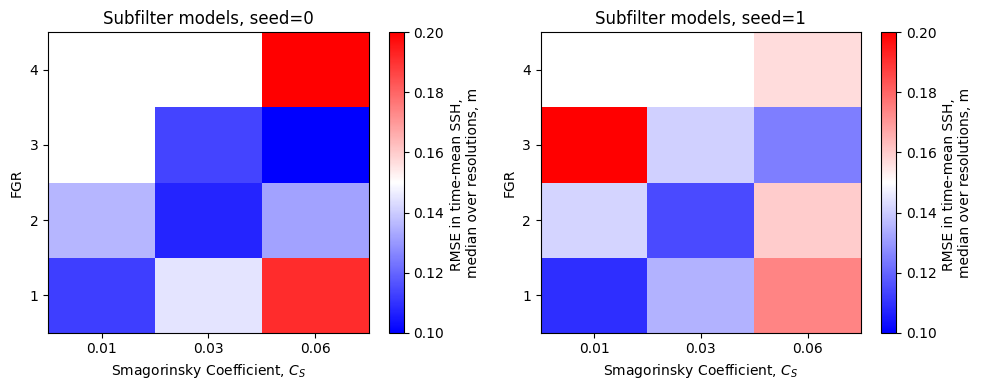

In [26]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
x = np.median(exp1_subfilter_smooth_1,0)
print(x)
plt.pcolormesh(x, cmap='bwr', clim=(0.1,0.2))
plt.xticks([0.5,1.5,2.5],[0.01,0.03,0.06])
plt.yticks([0.5,1.5,2.5,3.5],[1,2,3,4])
plt.colorbar(label='RMSE in time-mean SSH, \nmedian over resolutions, m')
plt.title('Subfilter models, seed=0')
plt.xlabel('Smagorinsky Coefficient, $C_S$')
plt.ylabel('FGR')

plt.subplot(1,2,2)
x = np.median(exp2_subfilter_smooth_1,0)
print(x)
plt.pcolormesh(x, cmap='bwr', clim=(0.1,0.2))
plt.xticks([0.5,1.5,2.5],[0.01,0.03,0.06])
plt.yticks([0.5,1.5,2.5,3.5],[1,2,3,4])
plt.colorbar(label='RMSE in time-mean SSH, \nmedian over resolutions, m')
plt.title('Subfilter models, seed=1')
plt.xlabel('Smagorinsky Coefficient, $C_S$')
plt.ylabel('FGR')
plt.tight_layout()

[[0.11091547 0.15081096 0.20642208]
 [0.09090043 0.11524396 0.14443563]
 [0.22547439 0.12035995 0.1020396 ]
 [       nan        nan 0.26770613]]
[[0.11916652 0.12453654 0.16544992]
 [0.10630272 0.09525439 0.14917511]
 [0.22027478 0.13280511 0.11109164]
 [       nan        nan 0.25886688]]


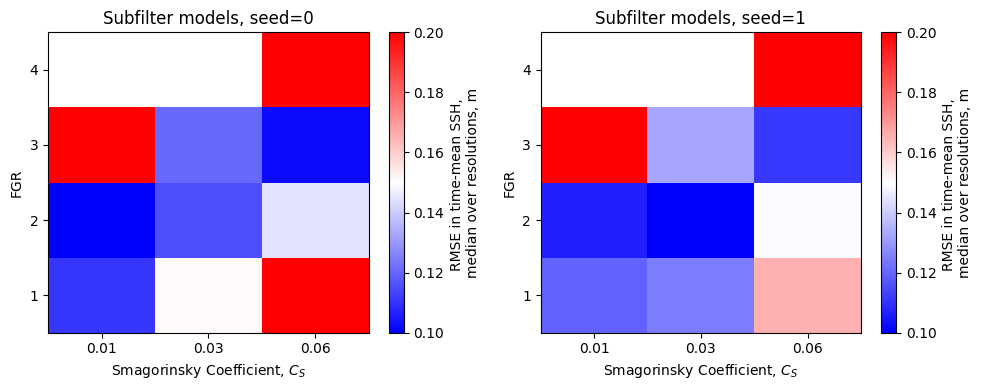

In [27]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
x = np.median(exp1_subfilter_smooth_4,0)
print(x)
plt.pcolormesh(x, cmap='bwr', clim=(0.1,0.2))
plt.xticks([0.5,1.5,2.5],[0.01,0.03,0.06])
plt.yticks([0.5,1.5,2.5,3.5],[1,2,3,4])
plt.colorbar(label='RMSE in time-mean SSH, \nmedian over resolutions, m')
plt.title('Subfilter models, seed=0')
plt.xlabel('Smagorinsky Coefficient, $C_S$')
plt.ylabel('FGR')

plt.subplot(1,2,2)
x = np.median(exp2_subfilter_smooth_4,0)
print(x)
plt.pcolormesh(x, cmap='bwr', clim=(0.1,0.2))
plt.xticks([0.5,1.5,2.5],[0.01,0.03,0.06])
plt.yticks([0.5,1.5,2.5,3.5],[1,2,3,4])
plt.colorbar(label='RMSE in time-mean SSH, \nmedian over resolutions, m')
plt.title('Subfilter models, seed=1')
plt.xlabel('Smagorinsky Coefficient, $C_S$')
plt.ylabel('FGR')
plt.tight_layout()

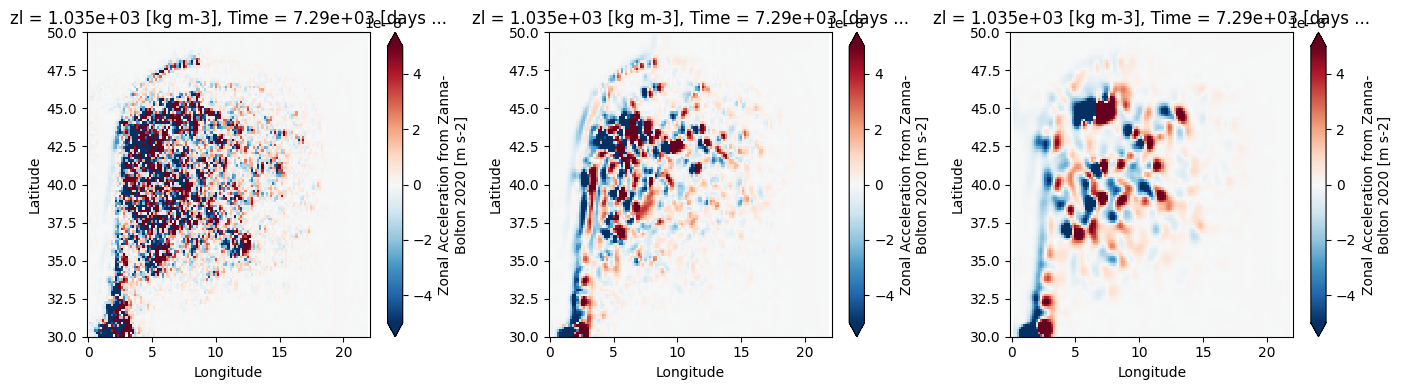

In [57]:
plt.figure(figsize=(14,4))
plt.subplot(1,3,1)
ds['May22-FGR2-subfilter-EXP1-R6-ZB-1.0-Cs-0.01'].mom.ZB2020u.isel(Time=-1,zl=0).plot(vmin=-5e-8)

plt.subplot(1,3,2)
ds['May22-FGR2-subfilter-EXP1-R6-ZB-1.0-Cs-0.01-smooth-1'].mom.ZB2020u.isel(Time=-1,zl=0).plot(vmin=-5e-8)

plt.subplot(1,3,3)
ds['May22-FGR2-subfilter-EXP1-R6-ZB-1.0-Cs-0.01-smooth-4'].mom.ZB2020u.isel(Time=-1,zl=0).plot(vmin=-5e-8)

plt.tight_layout()

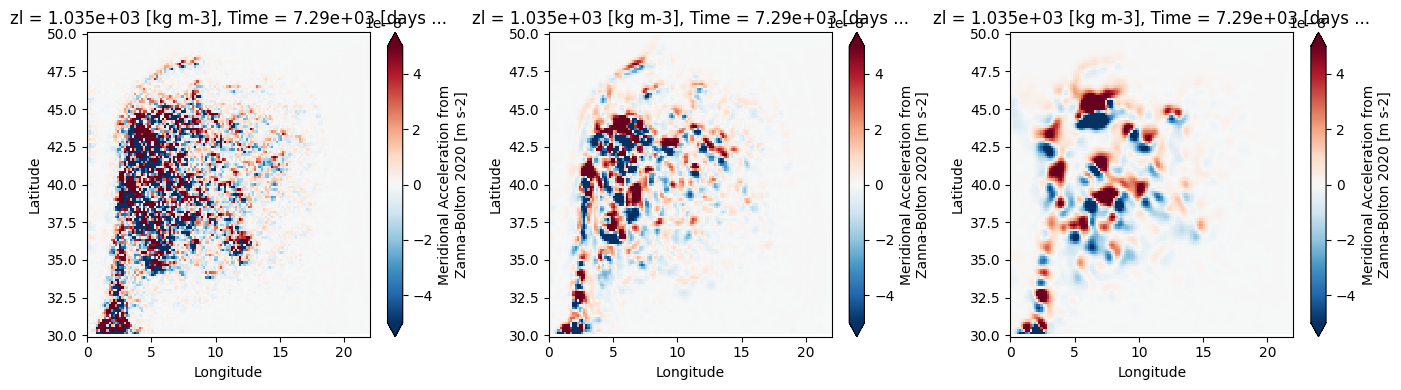

In [58]:
plt.figure(figsize=(14,4))
plt.subplot(1,3,1)
ds['May22-FGR2-subfilter-EXP1-R6-ZB-1.0-Cs-0.01'].mom.ZB2020v.isel(Time=-1,zl=0).plot(vmin=-5e-8)

plt.subplot(1,3,2)
ds['May22-FGR2-subfilter-EXP1-R6-ZB-1.0-Cs-0.01-smooth-1'].mom.ZB2020v.isel(Time=-1,zl=0).plot(vmin=-5e-8)

plt.subplot(1,3,3)
ds['May22-FGR2-subfilter-EXP1-R6-ZB-1.0-Cs-0.01-smooth-4'].mom.ZB2020v.isel(Time=-1,zl=0).plot(vmin=-5e-8)

plt.tight_layout()

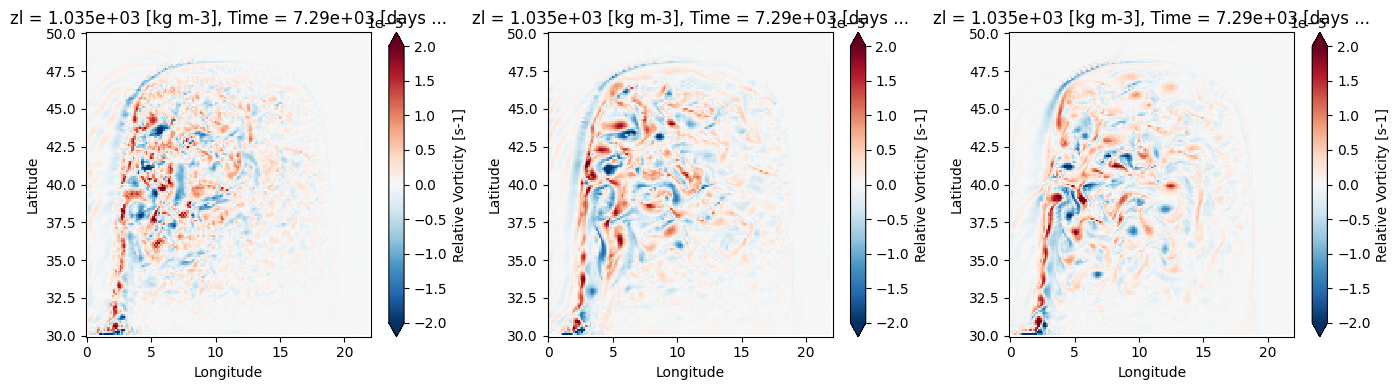

In [56]:
plt.figure(figsize=(14,4))
plt.subplot(1,3,1)
ds['May22-FGR2-subfilter-EXP1-R8-ZB-1.0-Cs-0.01'].RV.isel(Time=-1,zl=0).plot(vmin=-2e-5)

plt.subplot(1,3,2)
ds['May22-FGR2-subfilter-EXP1-R8-ZB-1.0-Cs-0.01-smooth-1'].RV.isel(Time=-1,zl=0).plot(vmin=-2e-5)

plt.subplot(1,3,3)
ds['May22-FGR2-subfilter-EXP1-R8-ZB-1.0-Cs-0.01-smooth-4'].RV.isel(Time=-1,zl=0).plot(vmin=-2e-5)

plt.tight_layout()

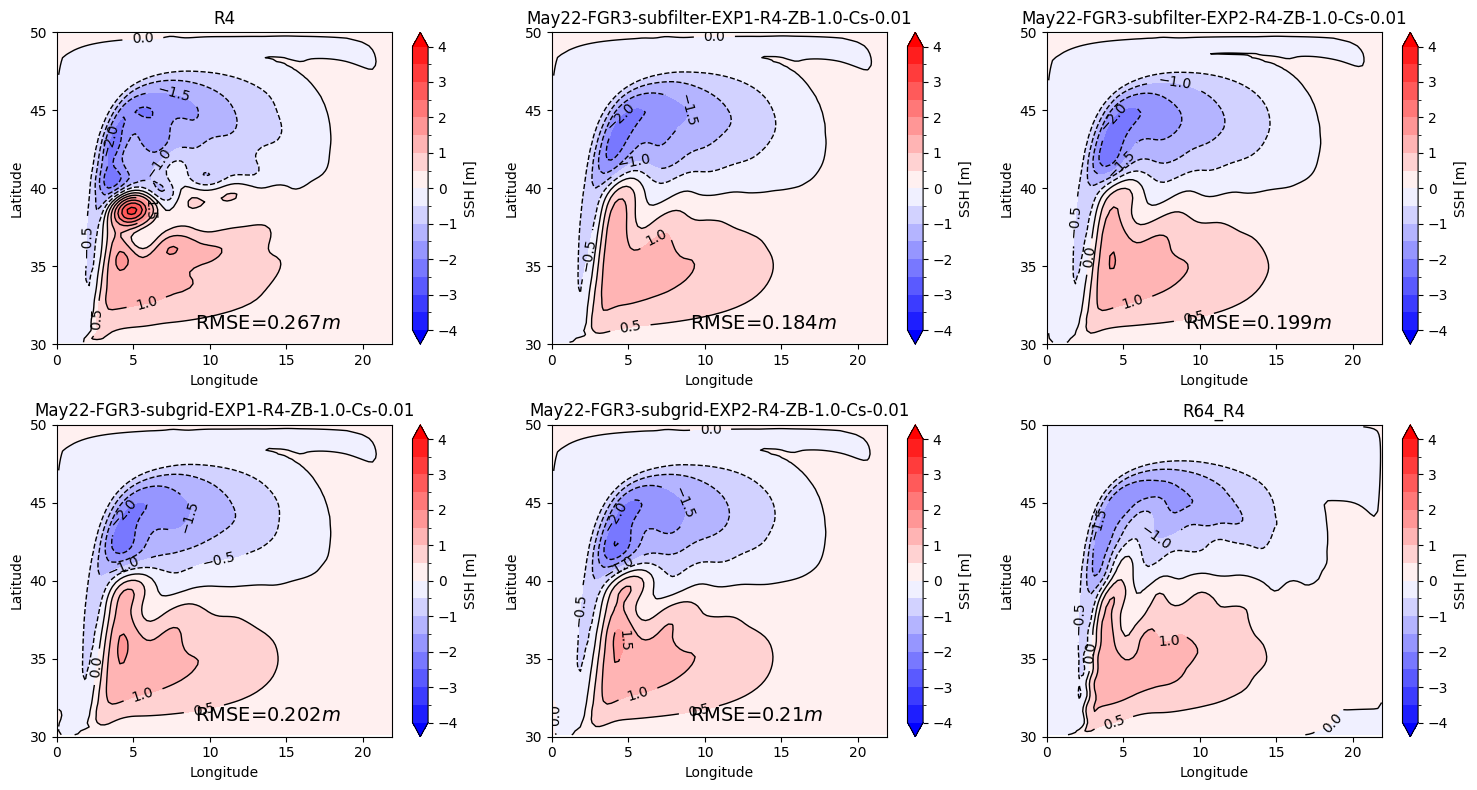

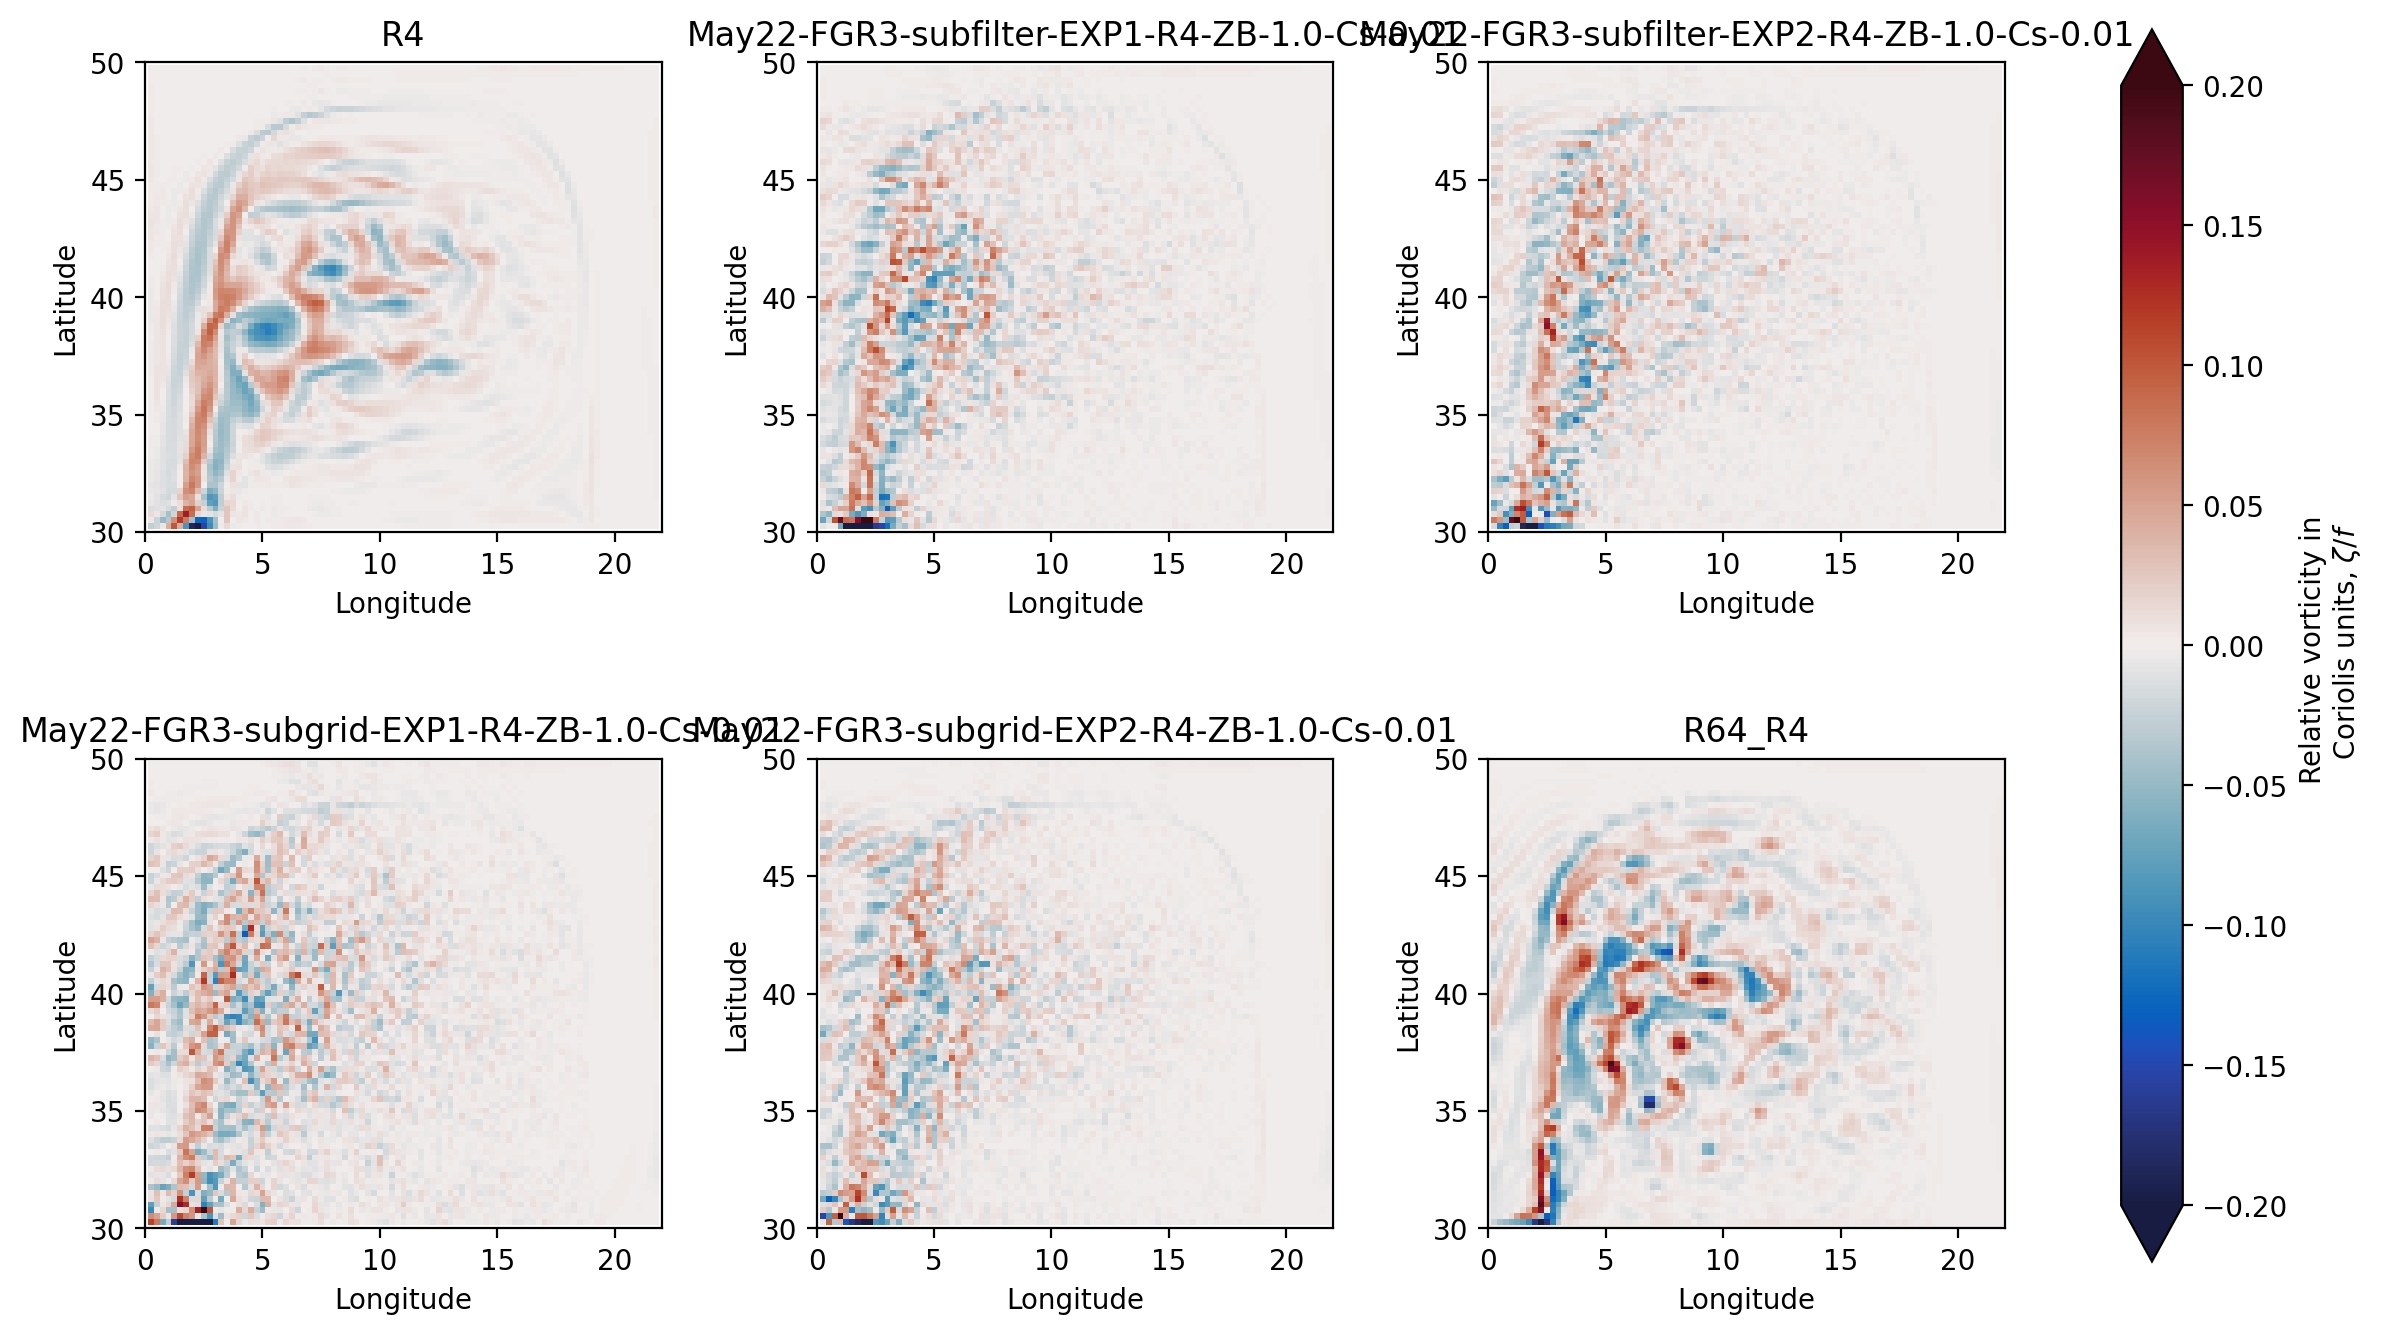

In [59]:
RR = 'R4'
Cs=0.01
FGR=3
suffix = ''
ds.plot_ssh([RR, 
             f'May22-FGR{FGR}-subfilter-EXP1-{suffix}{RR}-ZB-1.0-Cs-{Cs}', 
             f'May22-FGR{FGR}-subfilter-EXP2-{suffix}{RR}-ZB-1.0-Cs-{Cs}', 
             f'May22-FGR{FGR}-subgrid-EXP1-{suffix}{RR}-ZB-1.0-Cs-{Cs}', 
             f'May22-FGR{FGR}-subgrid-EXP2-{suffix}{RR}-ZB-1.0-Cs-{Cs}', 
             f'R64_{RR}'])

ds.plot_RV([RR, 
             f'May22-FGR{FGR}-subfilter-EXP1-{suffix}{RR}-ZB-1.0-Cs-{Cs}', 
             f'May22-FGR{FGR}-subfilter-EXP2-{suffix}{RR}-ZB-1.0-Cs-{Cs}', 
             f'May22-FGR{FGR}-subgrid-EXP1-{suffix}{RR}-ZB-1.0-Cs-{Cs}', 
             f'May22-FGR{FGR}-subgrid-EXP2-{suffix}{RR}-ZB-1.0-Cs-{Cs}', 
             f'R64_{RR}'])

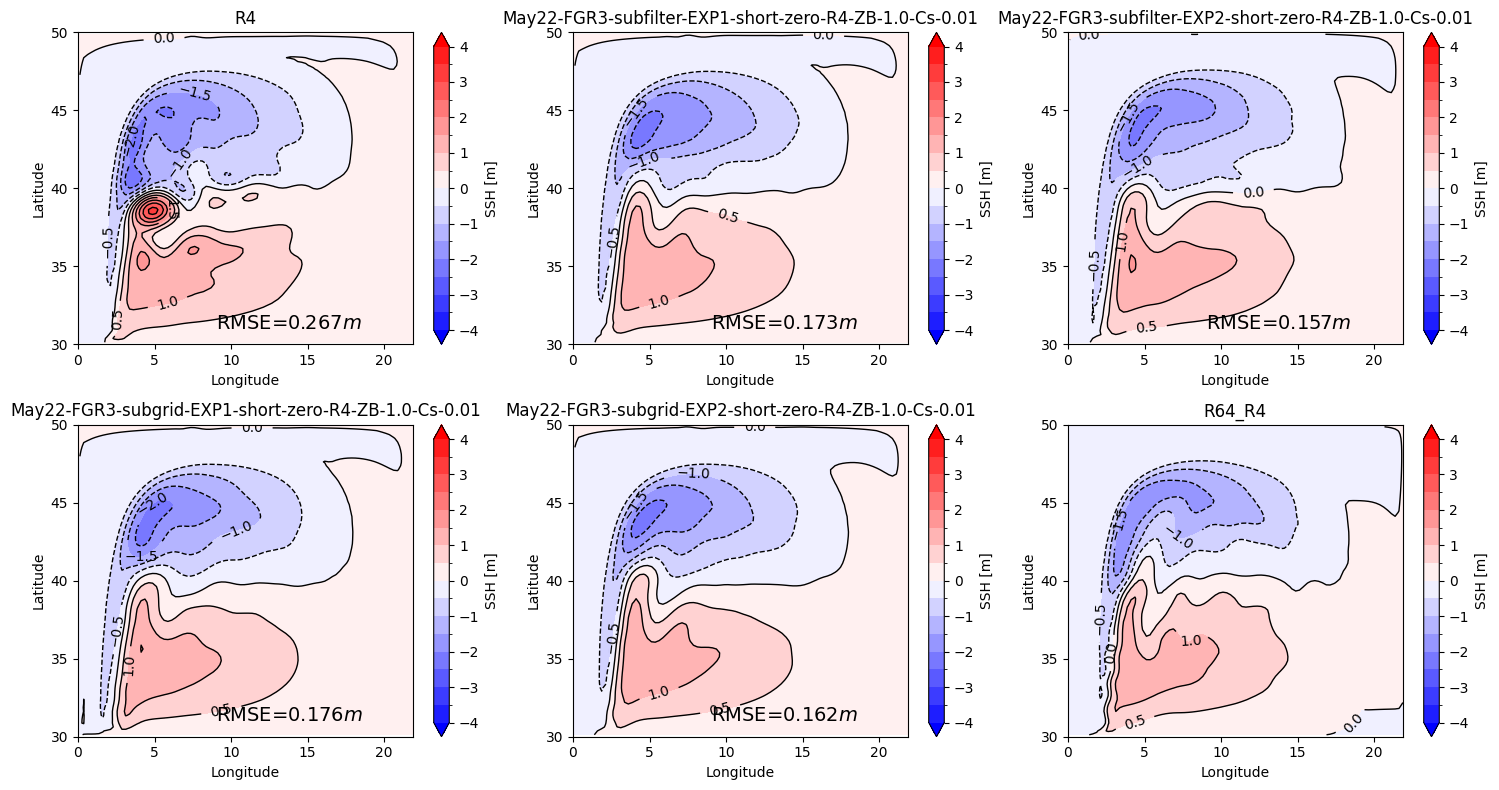

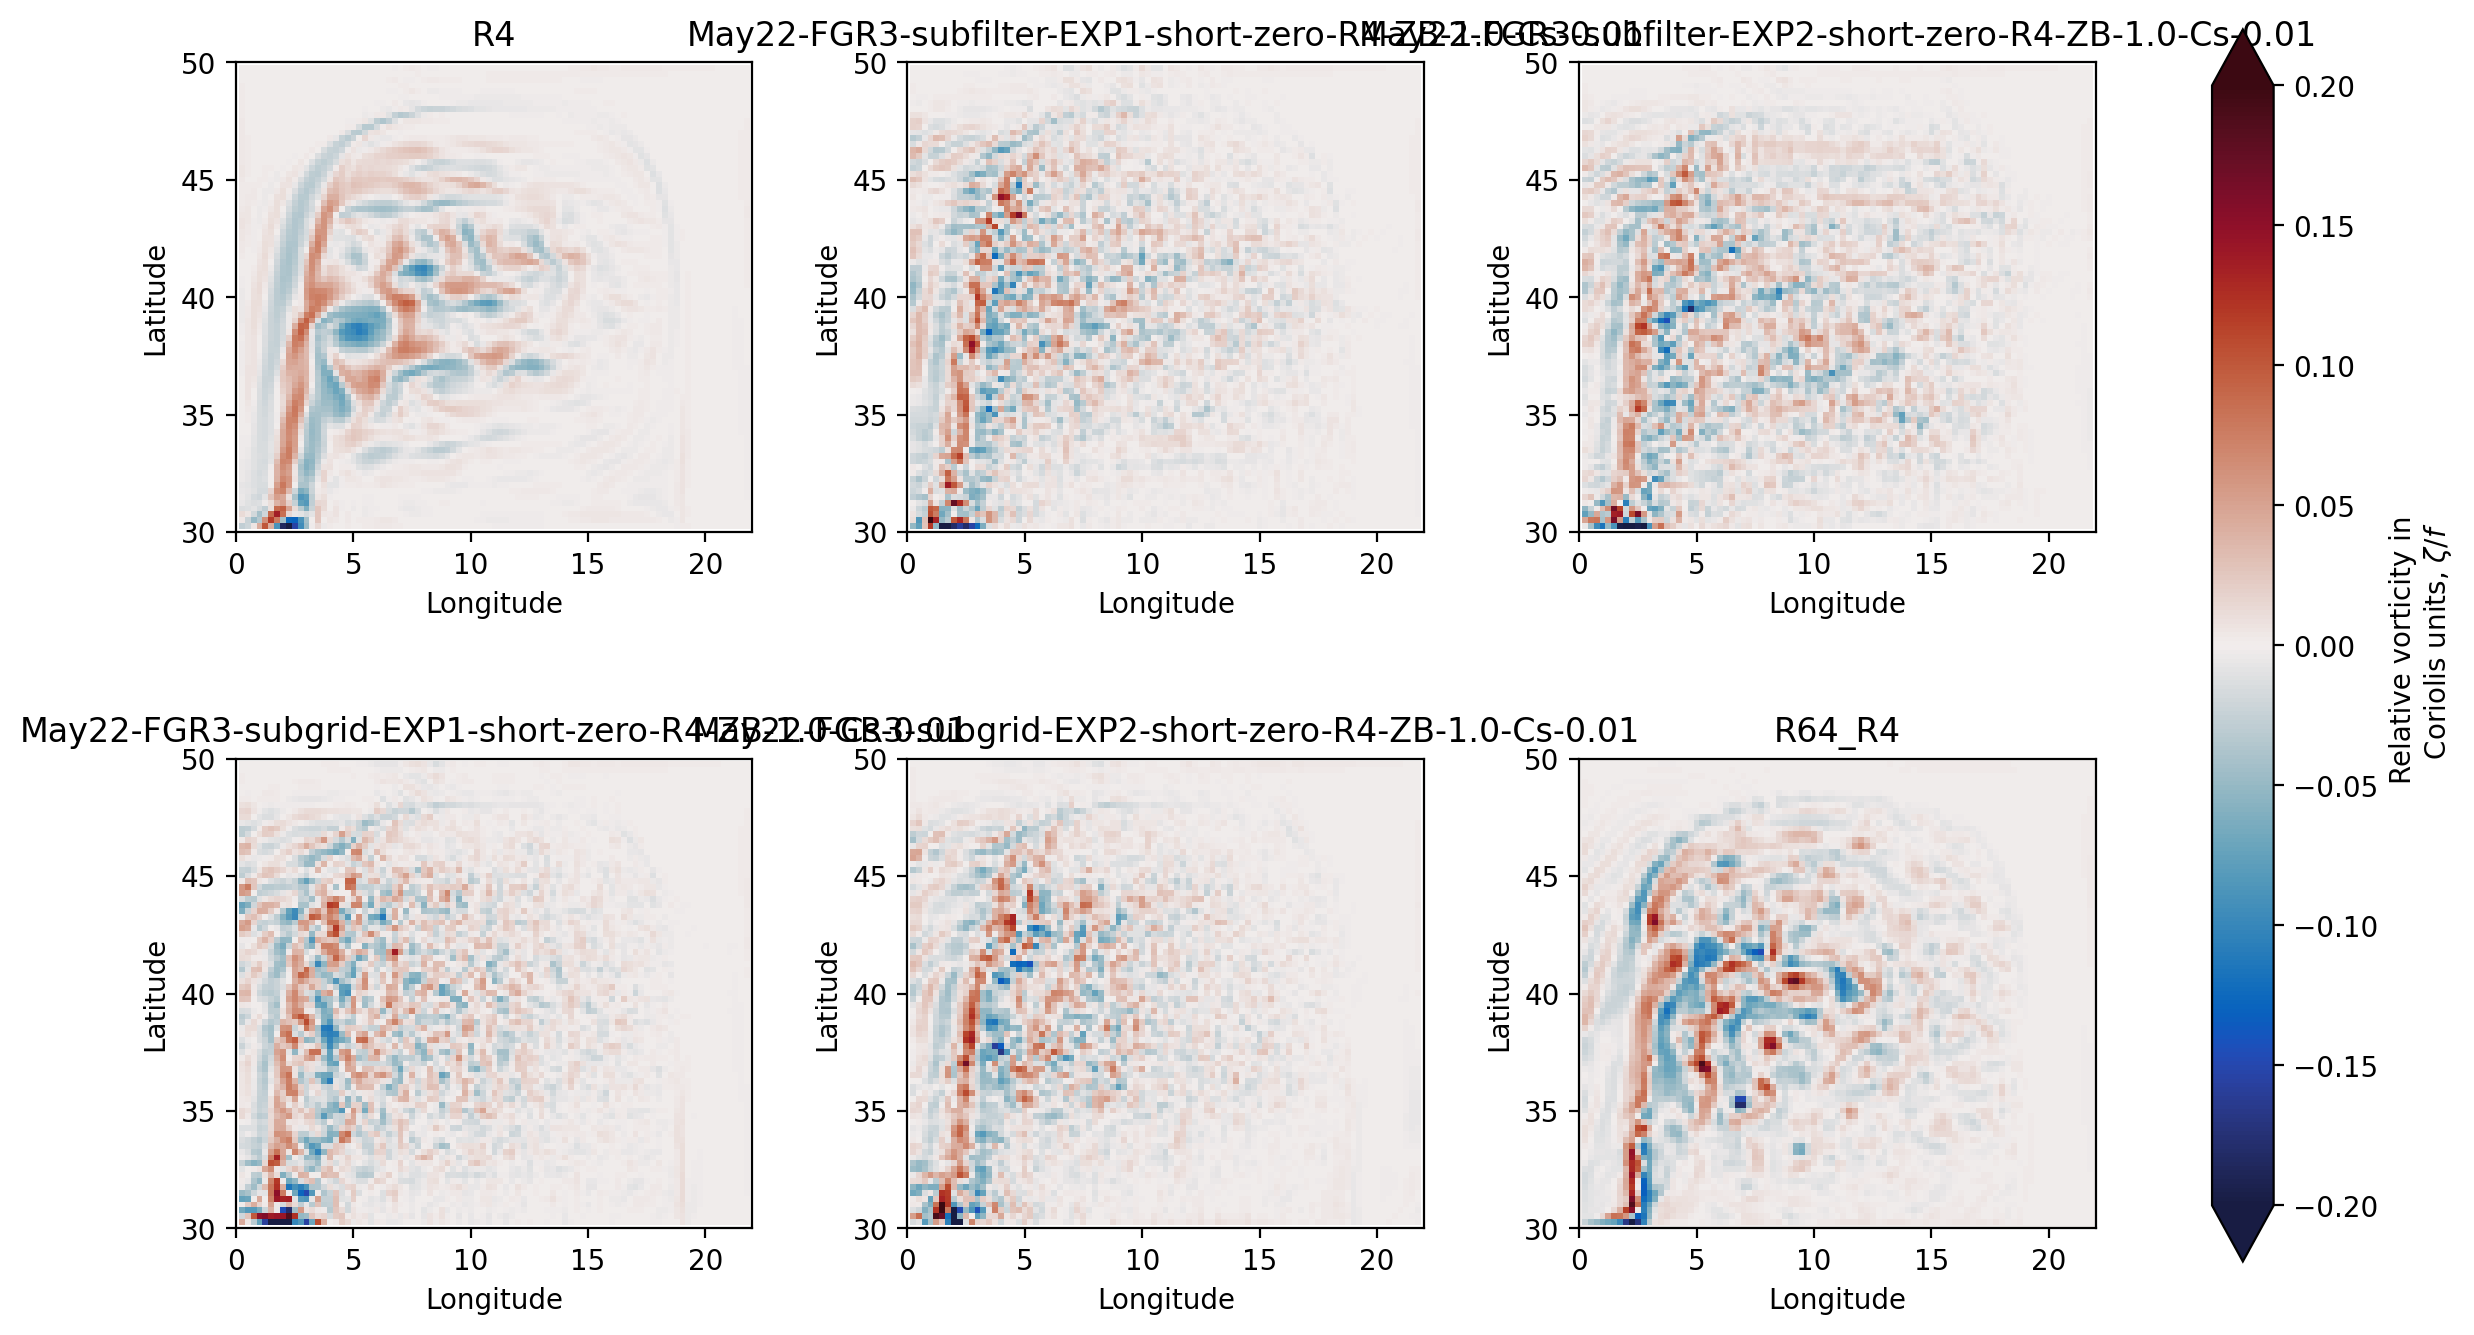

In [60]:
RR = 'R4'
Cs=0.01
FGR=3
suffix = 'short-zero-'
ds.plot_ssh([RR, 
             f'May22-FGR{FGR}-subfilter-EXP1-{suffix}{RR}-ZB-1.0-Cs-{Cs}', 
             f'May22-FGR{FGR}-subfilter-EXP2-{suffix}{RR}-ZB-1.0-Cs-{Cs}', 
             f'May22-FGR{FGR}-subgrid-EXP1-{suffix}{RR}-ZB-1.0-Cs-{Cs}', 
             f'May22-FGR{FGR}-subgrid-EXP2-{suffix}{RR}-ZB-1.0-Cs-{Cs}', 
             f'R64_{RR}'])

ds.plot_RV([RR, 
             f'May22-FGR{FGR}-subfilter-EXP1-{suffix}{RR}-ZB-1.0-Cs-{Cs}', 
             f'May22-FGR{FGR}-subfilter-EXP2-{suffix}{RR}-ZB-1.0-Cs-{Cs}', 
             f'May22-FGR{FGR}-subgrid-EXP1-{suffix}{RR}-ZB-1.0-Cs-{Cs}', 
             f'May22-FGR{FGR}-subgrid-EXP2-{suffix}{RR}-ZB-1.0-Cs-{Cs}', 
             f'R64_{RR}'])

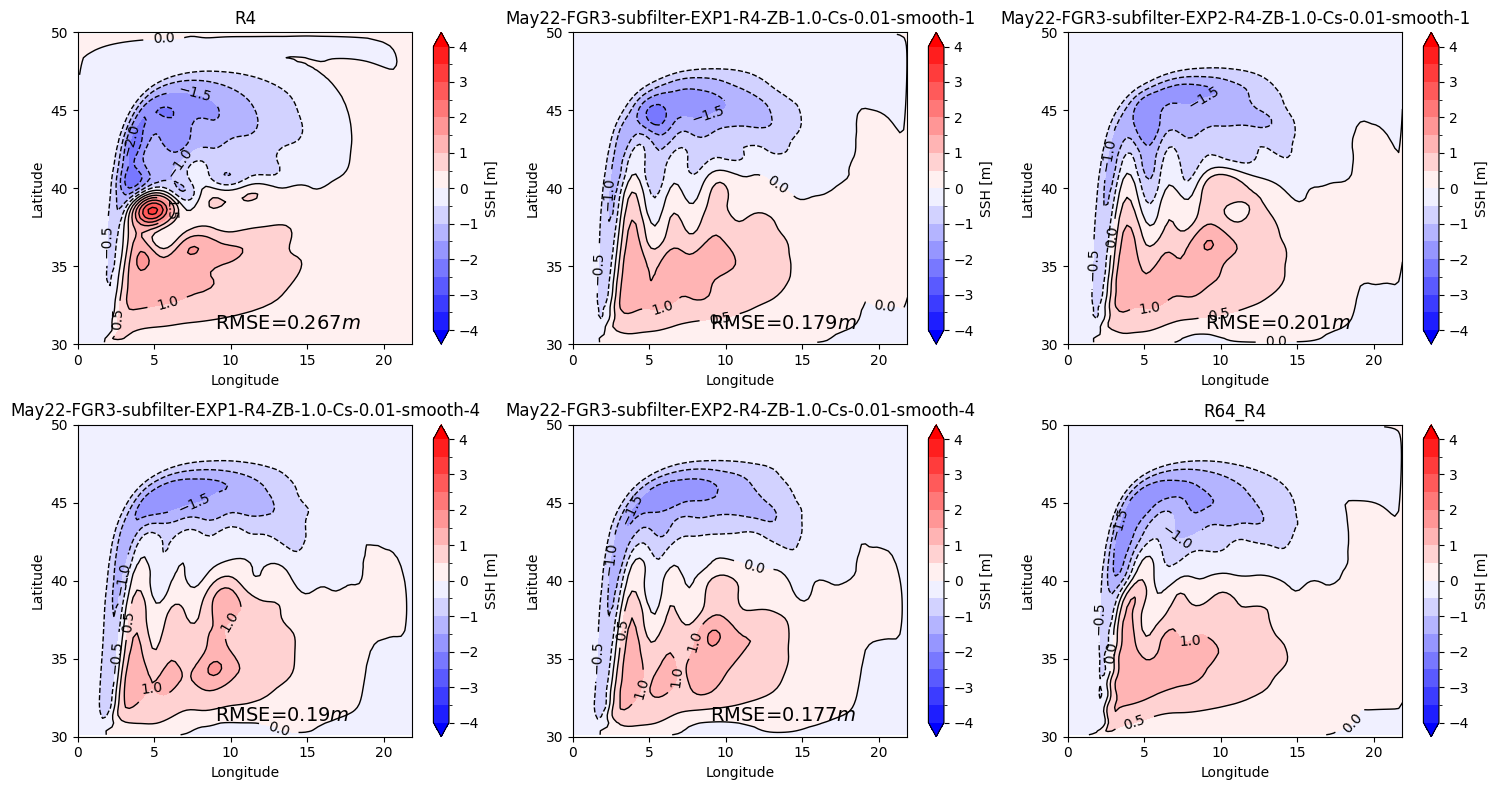

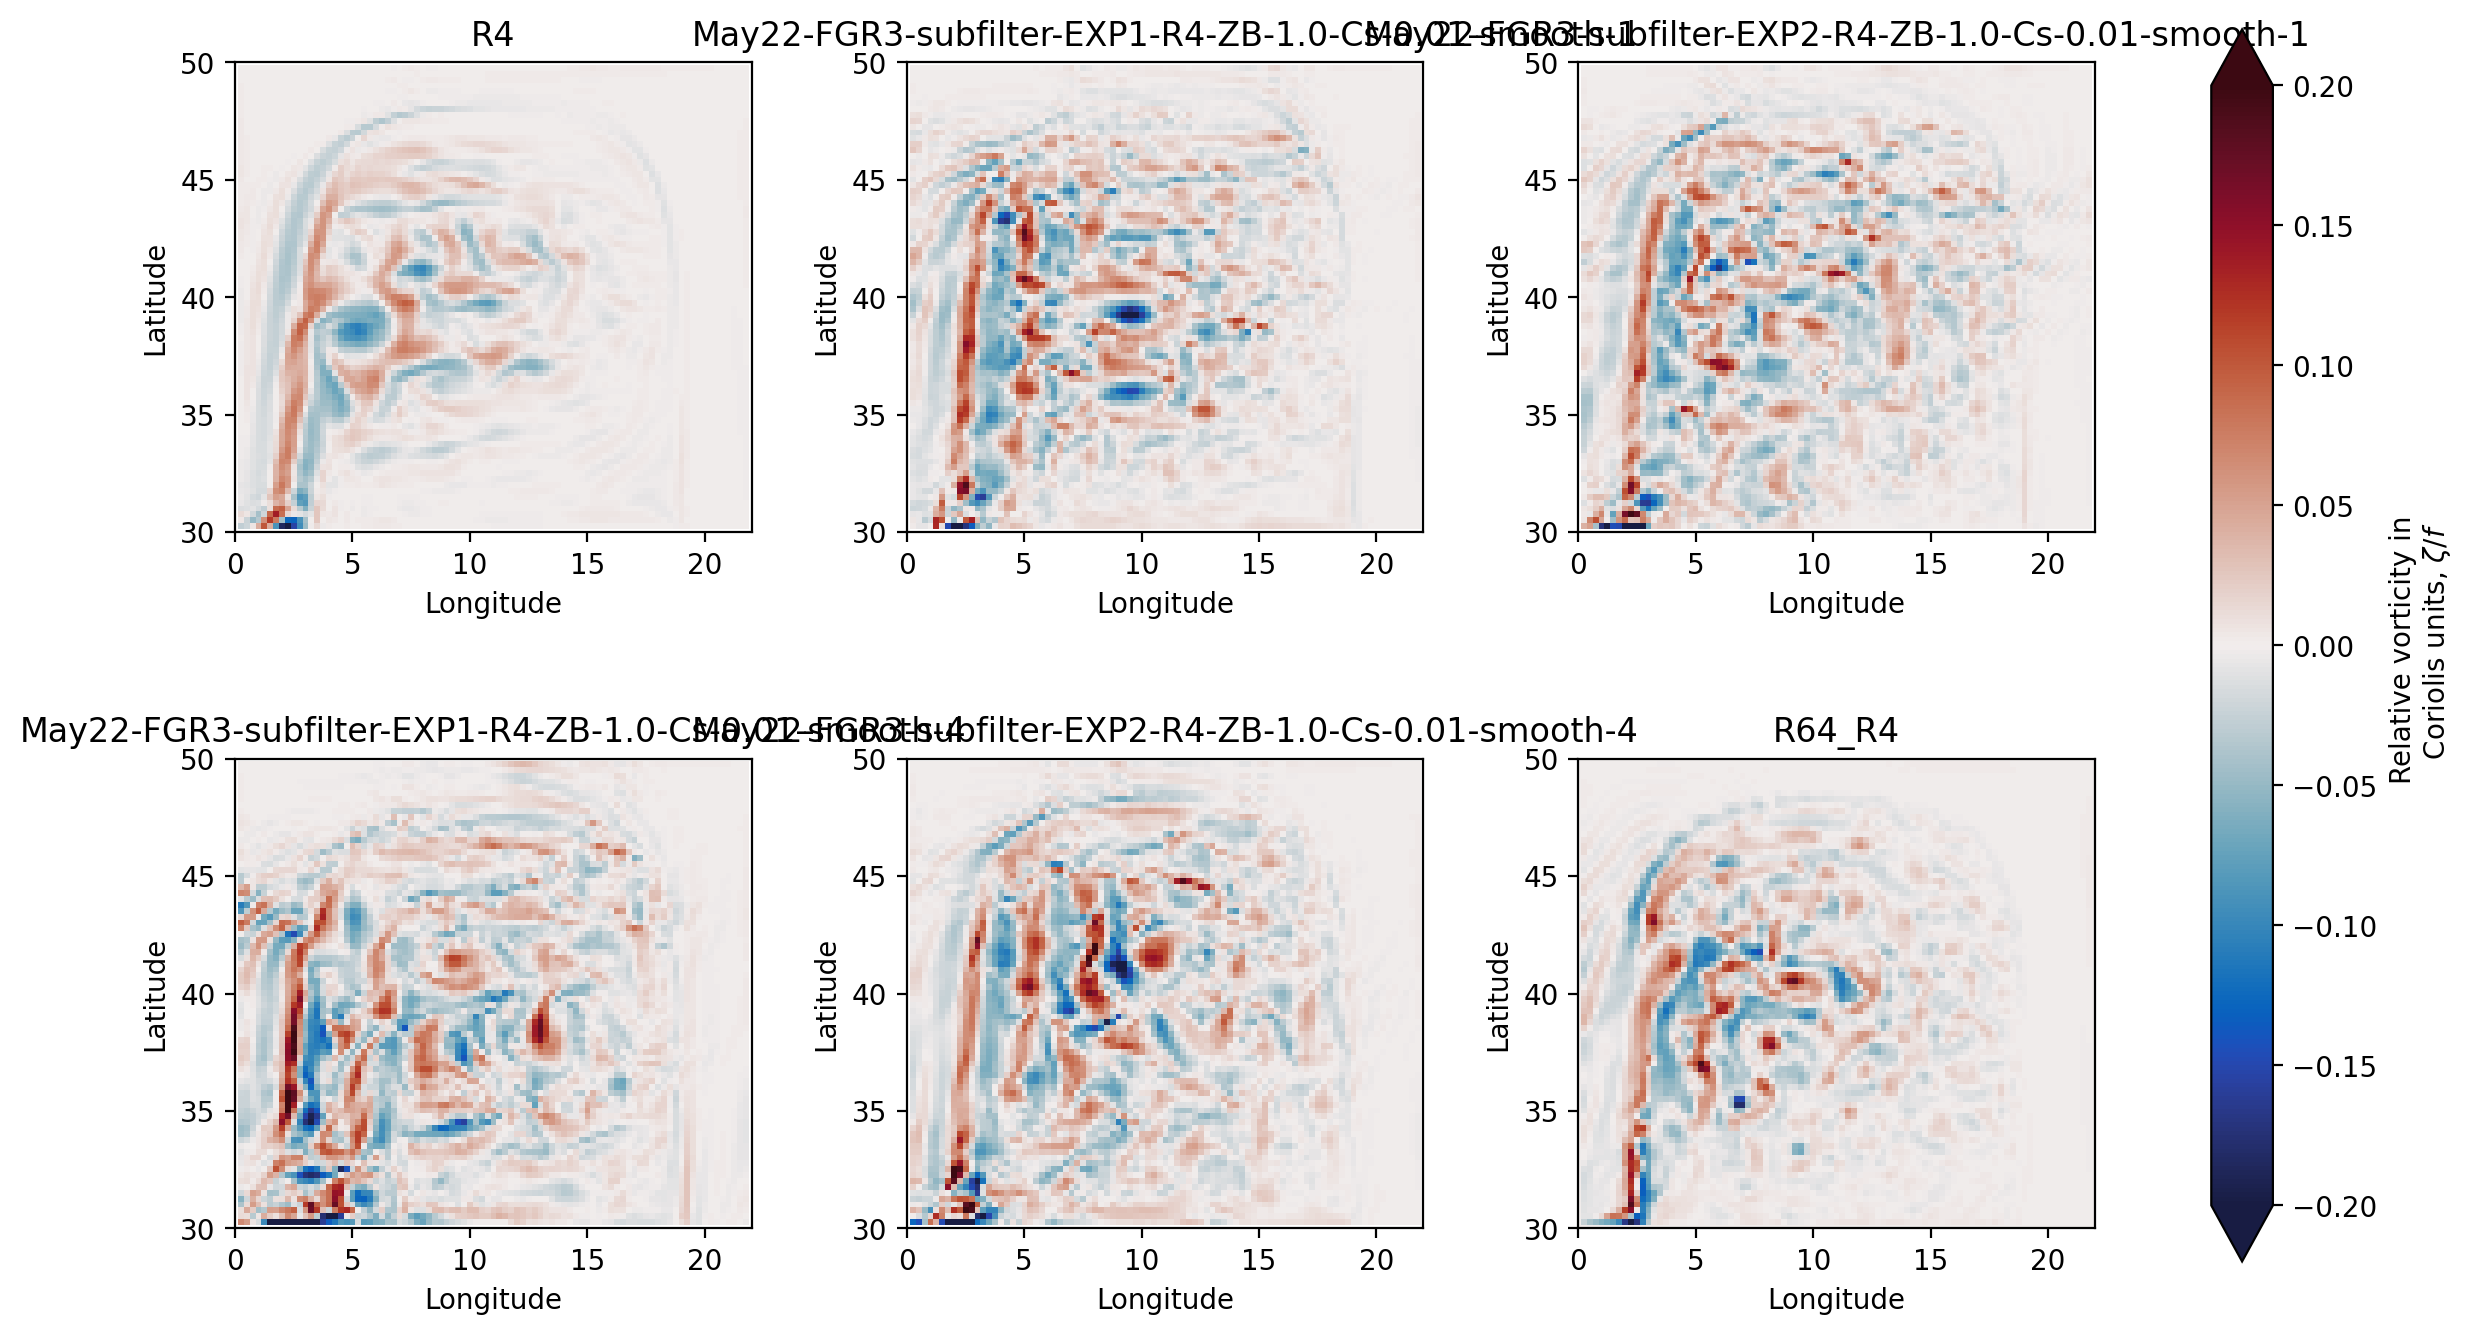

In [64]:
RR = 'R4'
Cs=0.01
FGR=3
suffix = ''
ds.plot_ssh([RR, 
             f'May22-FGR{FGR}-subfilter-EXP1-{suffix}{RR}-ZB-1.0-Cs-{Cs}-smooth-1', 
             f'May22-FGR{FGR}-subfilter-EXP2-{suffix}{RR}-ZB-1.0-Cs-{Cs}-smooth-1', 
             f'May22-FGR{FGR}-subfilter-EXP1-{suffix}{RR}-ZB-1.0-Cs-{Cs}-smooth-4', 
             f'May22-FGR{FGR}-subfilter-EXP2-{suffix}{RR}-ZB-1.0-Cs-{Cs}-smooth-4', 
             f'R64_{RR}'])

ds.plot_RV([RR, 
             f'May22-FGR{FGR}-subfilter-EXP1-{suffix}{RR}-ZB-1.0-Cs-{Cs}-smooth-1', 
             f'May22-FGR{FGR}-subfilter-EXP2-{suffix}{RR}-ZB-1.0-Cs-{Cs}-smooth-1', 
             f'May22-FGR{FGR}-subfilter-EXP1-{suffix}{RR}-ZB-1.0-Cs-{Cs}-smooth-4', 
             f'May22-FGR{FGR}-subfilter-EXP2-{suffix}{RR}-ZB-1.0-Cs-{Cs}-smooth-4', 
             f'R64_{RR}'])

In [8]:
def sample_ssh(exp, target):
    
    sample = []
    for year_start in [5, 10, 15]:
        try:
            year_end = year_start + 5
            idx = slice(365*year_start, 365*year_end)
            sample.append(
                Lk_error(ds[exp].ea.isel(zi=0).sel(Time=idx).mean('Time'), ds[target].ssh_mean)[0]
            )
        except:
            sample.append(np.nan)
    return xr.DataArray(sample, dims='sample')

def sample_KE(exp, target=None):
    sample = []
    for year_start in [5, 10, 15]:
        try:
            year_end = year_start + 5
            idx = slice(365*year_start, 365*year_end)
            u = ds[exp].u.sel(Time=idx)
            v = ds[exp].v.sel(Time=idx)
            h = ds[exp].h.sel(Time=idx)
    
            KE = 1e-15 * ds[exp].KE_joul(u, v, h).mean('Time').sum()
            sample.append(KE)
        except:
            sample.append(np.nan)
    return xr.DataArray(sample, dims='sample')

def sample_APE(exp, target=None):
    sample = []
    for year_start in [5, 10, 15]:
        try:
            year_end = year_start + 5
            idx = slice(365*year_start, 365*year_end)
            e = ds[exp].e.sel(Time=idx)
            APE = 1e-15 * (
                ds[exp].PE_joul(e).mean('Time').sum() + 
                ds[exp].PE_ssh(e).mean('Time').sum()
            )
            sample.append(APE)
        except:
            sample.append(np.nan)
    return xr.DataArray(sample, dims='sample')

In [9]:
error = {}

In [10]:
%%time
for fun, fun_str in zip([sample_KE, sample_APE, sample_ssh], ['KE', 'APE', 'ssh']):
    error[f'bare-{fun_str}'] = xr.concat([fun(conf,f'R64_{conf}') for conf in ['R2', 'R3', 'R4', 'R5', 'R6', 'R7', 'R8']], dim='res')
    #error[f'bare-en-diss-{fun_str}'] = xr.concat([fun(f'{conf}-en-diss',f'R64_{conf}') for conf in ['R2', 'R3', 'R4', 'R5', 'R6', 'R7', 'R8']], dim='res')
    error[f'ZB-Smooth-{fun_str}'] = xr.concat([fun(f'ZB-Smooth-{conf}-ZB-1.0', f'R64_{conf}') for conf in ['R2', 'R3', 'R4', 'R5', 'R6', 'R7', 'R8']], dim='res')
    error[f'Jansen-Held-{fun_str}'] = xr.concat([fun(f'Jansen-Held-{conf}-ref', f'R64_{conf}') for conf in ['R2', 'R3', 'R4', 'R5', 'R6', 'R7', 'R8']], dim='res')

CPU times: user 50.1 s, sys: 6.76 s, total: 56.8 s
Wall time: 37.4 s


In [11]:
%%time
for fun, fun_str in zip([sample_KE, sample_APE, sample_ssh], ['KE', 'APE', 'ssh']):
    error[f'May22-FGR3-subfilter-EXP1-ZB-1.0-Cs-0.06-{fun_str}'] = xr.concat([fun(f'May22-FGR3-subfilter-EXP1-{conf}-ZB-1.0-Cs-0.06',f'R64_{conf}') for conf in ['R2', 'R3', 'R4', 'R5', 'R6', 'R7', 'R8']], dim='res')
    error[f'May22-FGR3-subfilter-EXP2-ZB-1.0-Cs-0.06-{fun_str}'] = xr.concat([fun(f'May22-FGR3-subfilter-EXP2-{conf}-ZB-1.0-Cs-0.06',f'R64_{conf}') for conf in ['R2', 'R3', 'R4', 'R5', 'R6', 'R7', 'R8']], dim='res')

CPU times: user 35.1 s, sys: 5.15 s, total: 40.2 s
Wall time: 27 s


In [12]:
%%time
for fun, fun_str in zip([sample_KE, sample_APE, sample_ssh], ['KE', 'APE', 'ssh']):
    error[f'May22-FGR3-subgrid-EXP1-ZB-1.0-Cs-0.06-{fun_str}'] = xr.concat([fun(f'May22-FGR3-subgrid-EXP1-{conf}-ZB-1.0-Cs-0.06',f'R64_{conf}') for conf in ['R2', 'R3', 'R4', 'R5', 'R6', 'R7', 'R8']], dim='res')
    error[f'May22-FGR3-subgrid-EXP2-ZB-1.0-Cs-0.06-{fun_str}'] = xr.concat([fun(f'May22-FGR3-subgrid-EXP2-{conf}-ZB-1.0-Cs-0.06',f'R64_{conf}') for conf in ['R2', 'R3', 'R4', 'R5', 'R6', 'R7', 'R8']], dim='res')

CPU times: user 34.9 s, sys: 5.09 s, total: 40 s
Wall time: 26.9 s


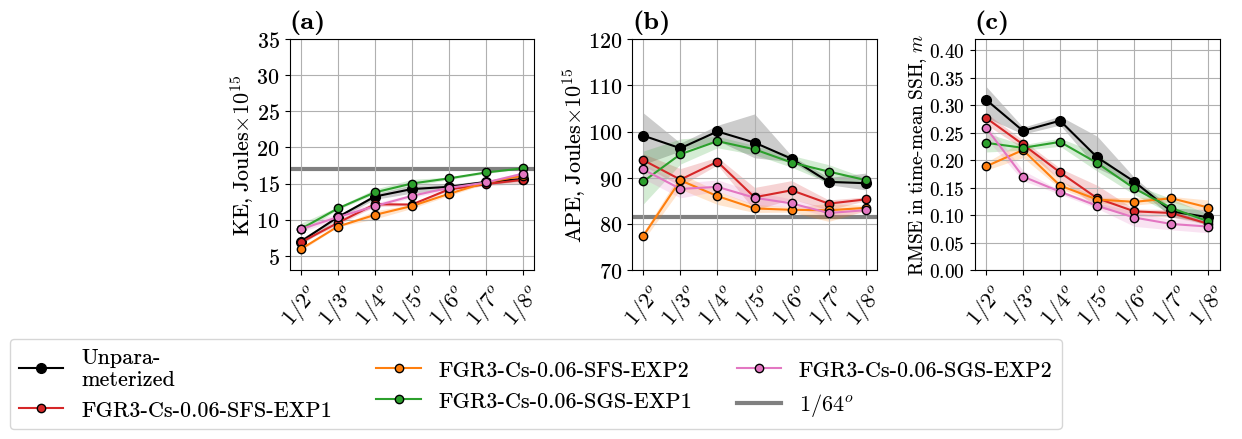

In [16]:
default_rcParams({'font.size': 16, 'figure.subplot.wspace': 0.4, 'figure.subplot.hspace': 0.1})
plt.figure(figsize=(12,3))

yellow = [0.9290, 0.6940, 0.1250]
violet = [0.4940, 0.1840, 0.5560]
lightblue = [0.3010, 0.7450, 0.9330]

for row, fun_str in enumerate(['KE', 'APE', 'ssh']):
    plt.subplot(1,3,row+1)

    def plot_markers_with_filling(model='Jansen-Held', color='tab:red', marker='s', label=None, markersize=None, lw=None):
        error[model].mean('sample').plot(color=color, marker=marker, label=label, markersize=markersize, markeredgecolor='k', lw=lw)
        plt.fill_between(range(7), error[model].min('sample'), error[model].max('sample'), color=color, alpha=0.2, lw=0)
    
    plot_markers_with_filling(f'bare-{fun_str}', 'k', 'o', 'Unpara-\nmeterized', 7)
    #plot_markers_with_filling(f'ZB-Smooth-{fun_str}', yellow, 'o', 'ZB20-Smooth', 6)
    #plot_markers_with_filling(f'Jansen-Held-{fun_str}', 'tab:olive', 'o', 'JHAH15', 6)

    plot_markers_with_filling(f'May22-FGR3-subfilter-EXP1-ZB-1.0-Cs-0.06-{fun_str}', 'tab:red', 'o', 'FGR3-Cs-0.06-SFS-EXP1', 6)
    plot_markers_with_filling(f'May22-FGR3-subfilter-EXP2-ZB-1.0-Cs-0.06-{fun_str}', 'tab:orange', 'o', 'FGR3-Cs-0.06-SFS-EXP2', 6)

    plot_markers_with_filling(f'May22-FGR3-subgrid-EXP1-ZB-1.0-Cs-0.06-{fun_str}', 'tab:green', 'o', 'FGR3-Cs-0.06-SGS-EXP1', 6)
    plot_markers_with_filling(f'May22-FGR3-subgrid-EXP2-ZB-1.0-Cs-0.06-{fun_str}', 'tab:pink', 'o', 'FGR3-Cs-0.06-SGS-EXP2', 6)
    
    plt.xticks([0,1,2,3,4,5,6], ['$1/2^o$', '$1/3^o$', '$1/4^o$', '$1/5^o$', '$1/6^o$', '$1/7^o$', '$1/8^o$'],rotation=50)    
    plt.grid()
    plt.xlabel('')
    if fun_str == 'KE':
        yticks = np.arange(5,40,5)
        plt.ylabel('KE, Joules$\\times10^{15}$')
        plt.yticks(yticks)
        plt.ylim([3,35])
        plt.axhline(y=17,color='gray', zorder=-1,lw=3)
    if fun_str == 'APE':
        yticks = np.arange(70,130,10)
        plt.ylabel('APE, Joules$\\times10^{15}$')
        plt.yticks(yticks)
        plt.ylim([min(yticks), max(yticks)])
        plt.axhline(y=81.5,color='gray',zorder=-1,lw=3)
    
    if fun_str == 'ssh':
        yticks = np.arange(0,0.45,0.05)
        plt.ylabel('RMSE in time-mean SSH, $m$', fontsize=14)
        plt.yticks(yticks, fontsize=14)
        plt.ylim([0,0.42])

plt.gcf().align_ylabels()
set_letters(fontsize=18,x=0.0,y=1.05)
plt.plot(np.nan,np.nan,'-',color='gray',lw=3,label='$1/64^o$')
plt.legend(ncol=3, bbox_to_anchor=(0.4,-0.25))


#plt.suptitle('Second realization of training algorithm', y=1.1)
#plt.savefig('../figures/16May/ANN-CORIOLIS_EN_DIS.pdf')

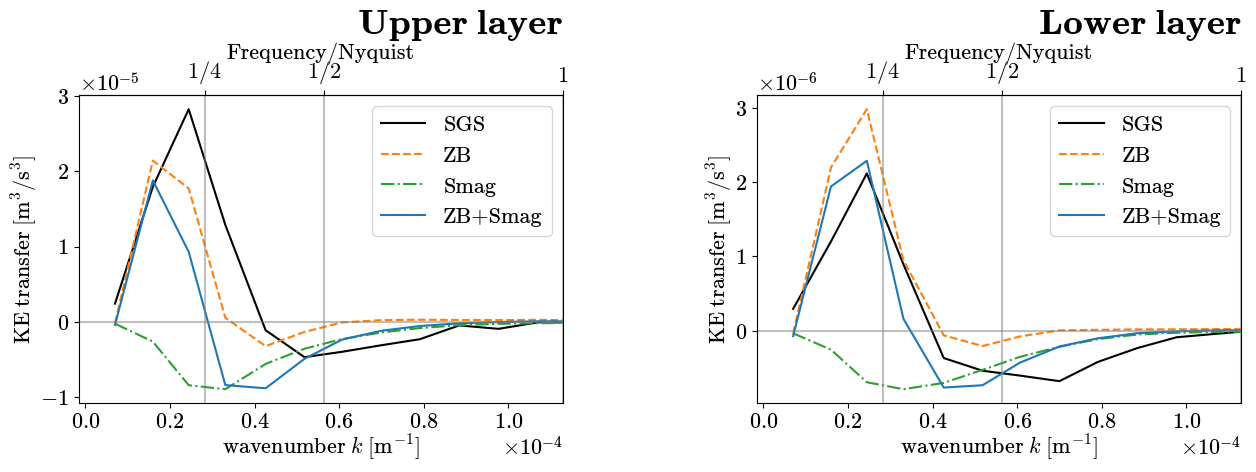

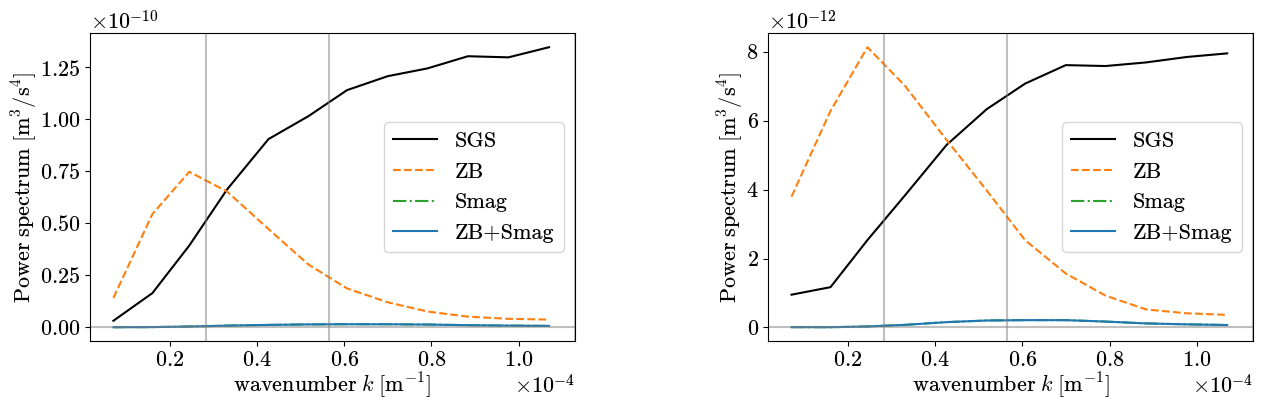

In [22]:
ds.plot_transfer('May22-FGR3-subgrid-EXP2-R4-ZB-1.0-Cs-0.06')

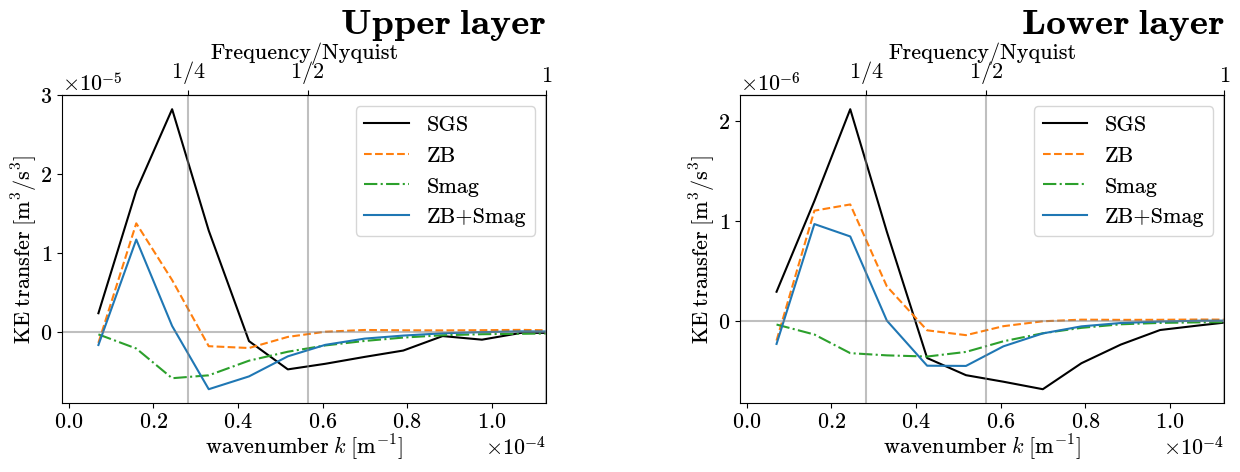

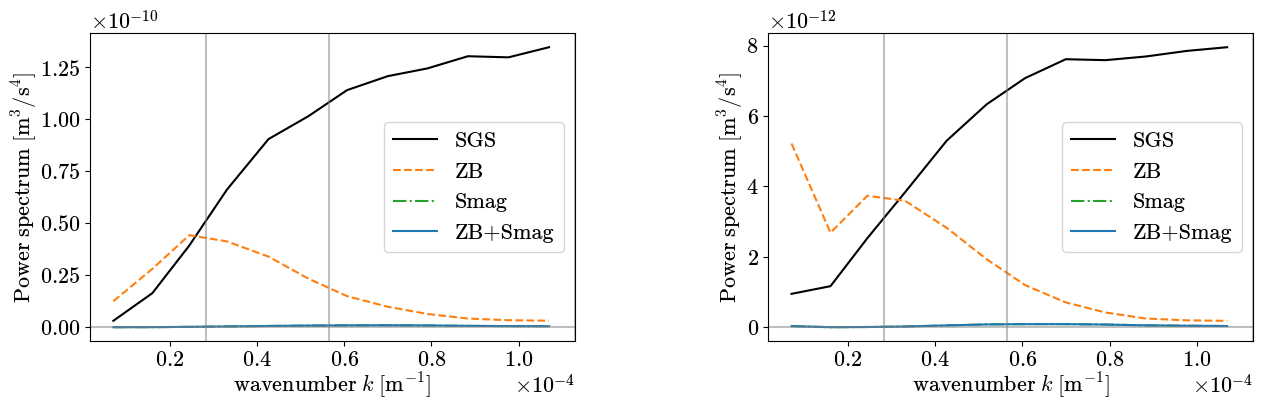

In [23]:
ds.plot_transfer('May22-FGR3-subgrid-EXP1-R4-ZB-1.0-Cs-0.06')

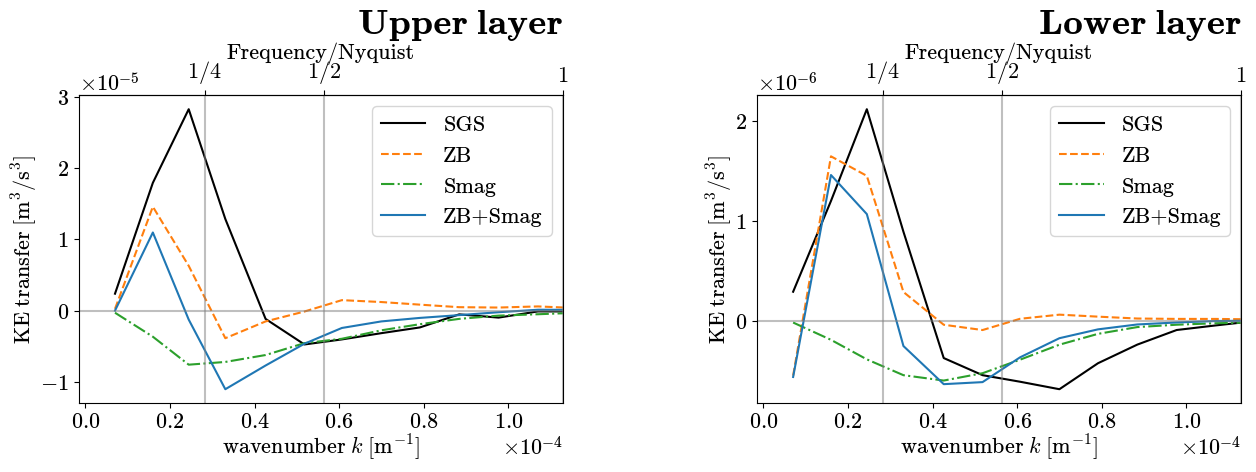

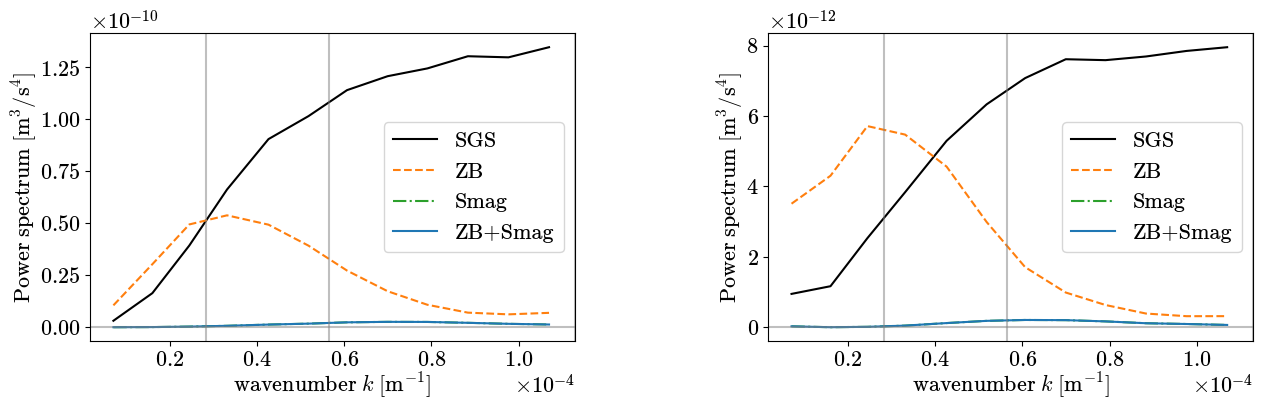

In [24]:
ds.plot_transfer('May22-FGR3-subfilter-EXP1-R4-ZB-1.0-Cs-0.06')

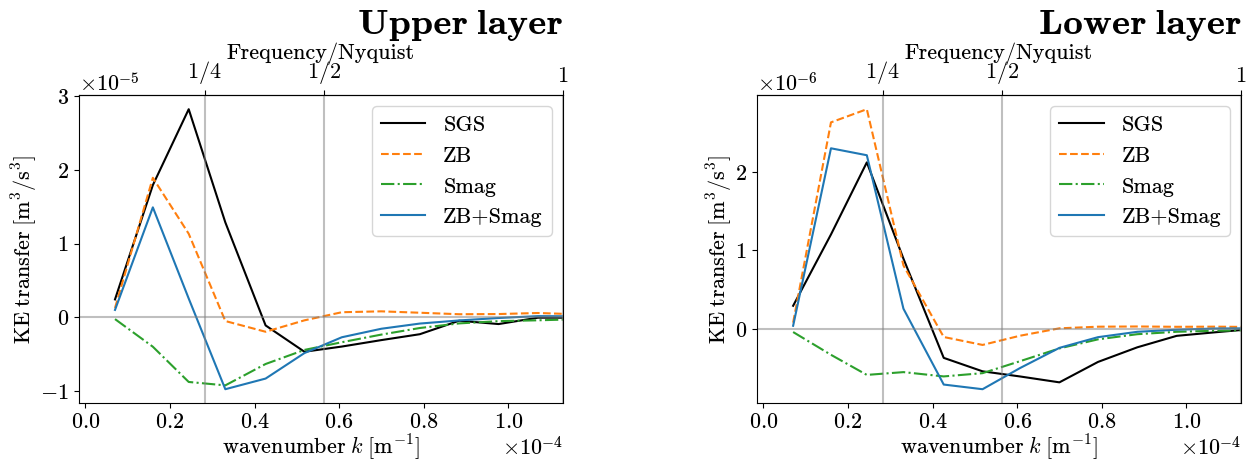

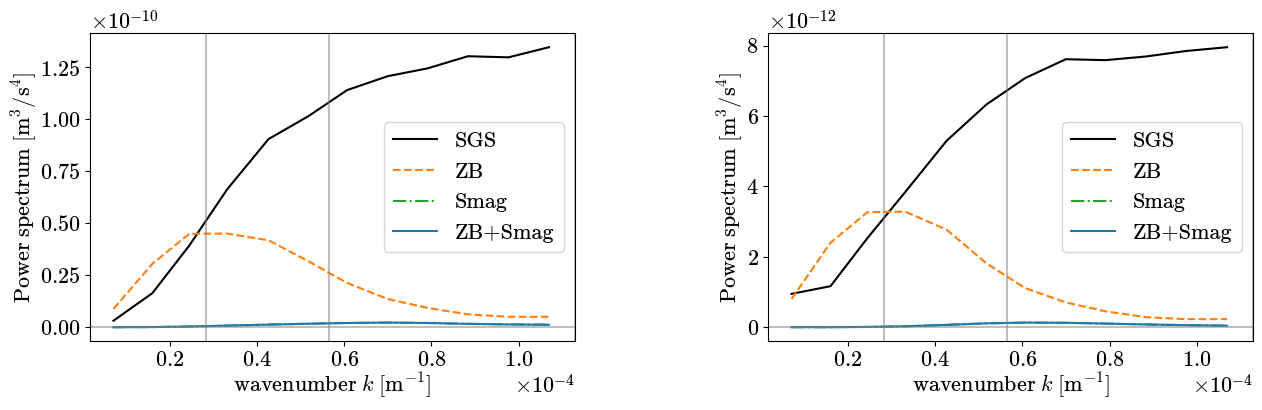

In [25]:
ds.plot_transfer('May22-FGR3-subfilter-EXP2-R4-ZB-1.0-Cs-0.06')

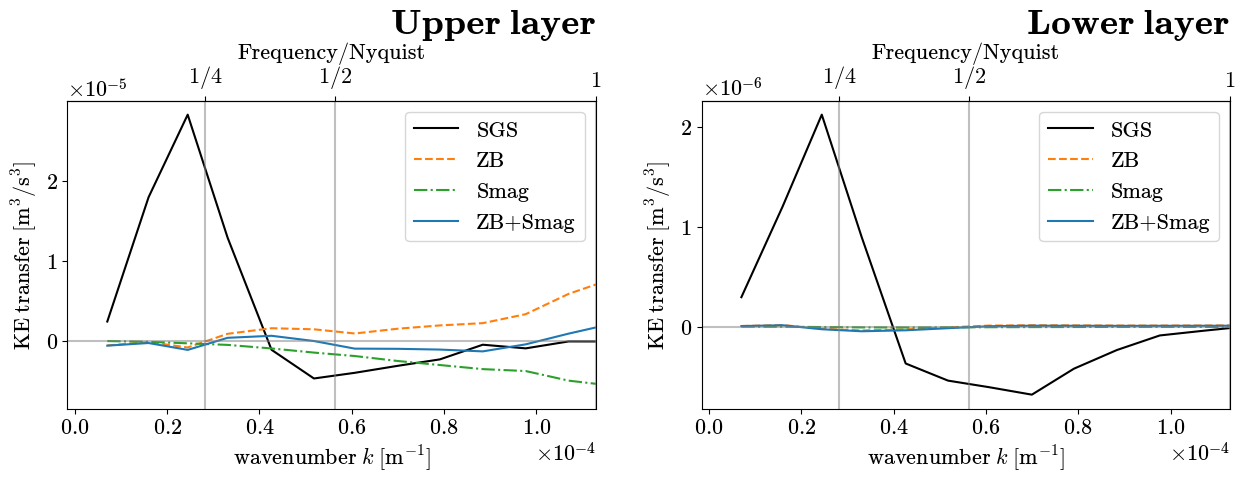

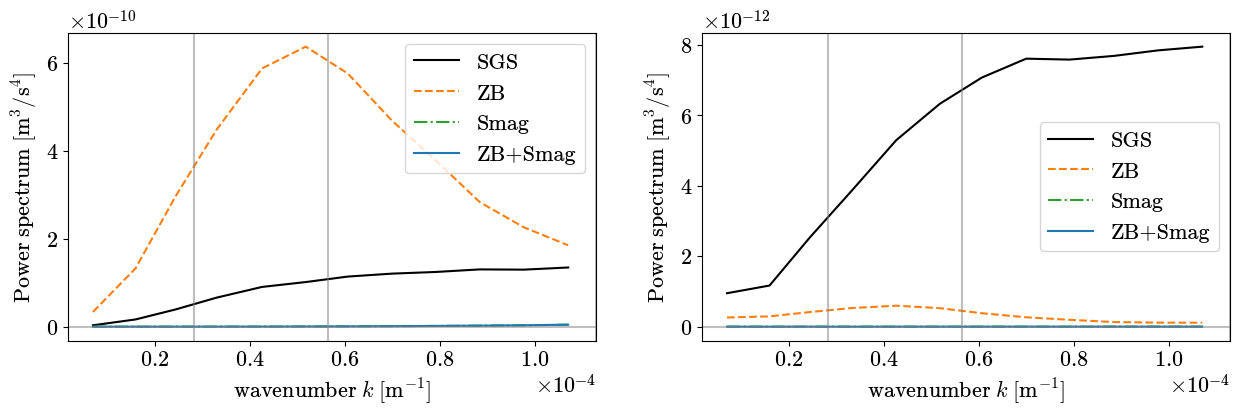

In [49]:
ds.plot_transfer('May22-FGR4-subfilter-EXP2-R4-ZB-1.0-Cs-0.01')

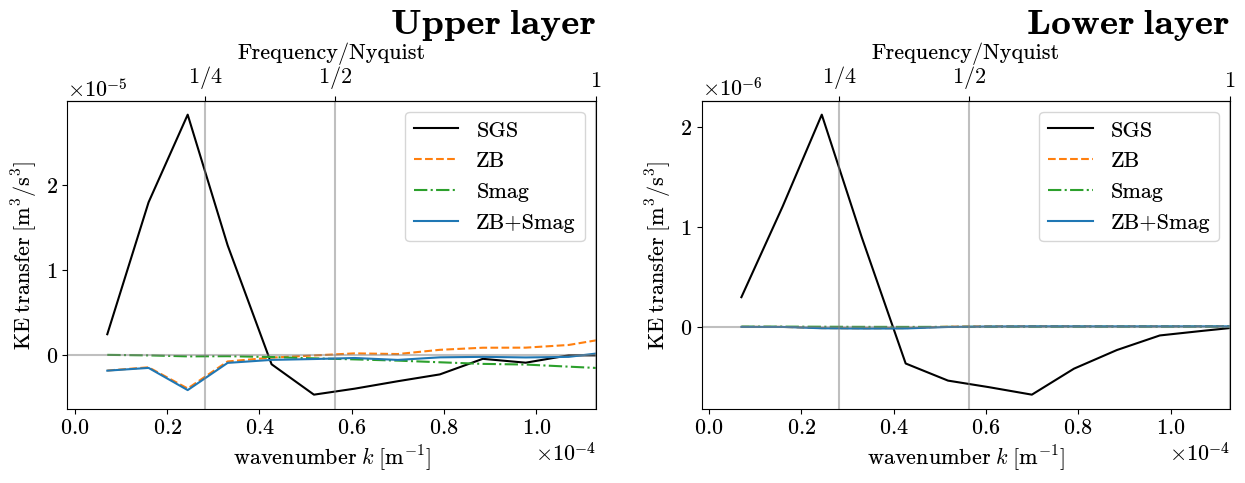

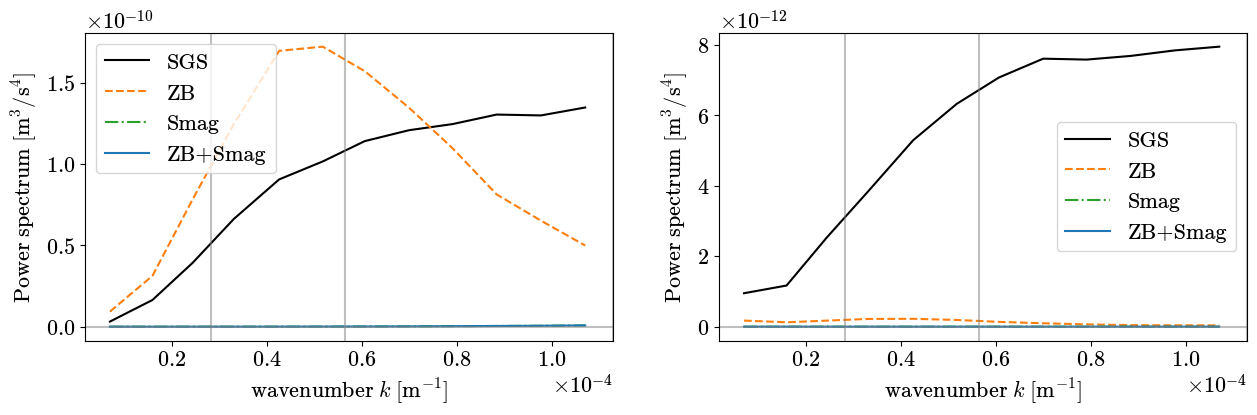

In [50]:
ds.plot_transfer('May22-FGR4-subgrid-EXP2-R4-ZB-1.0-Cs-0.01')

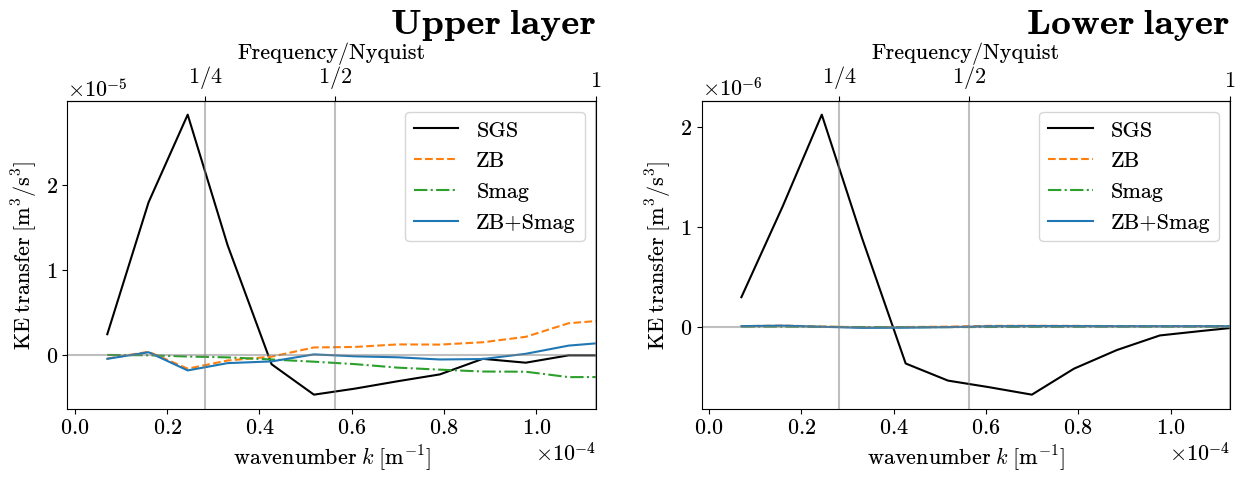

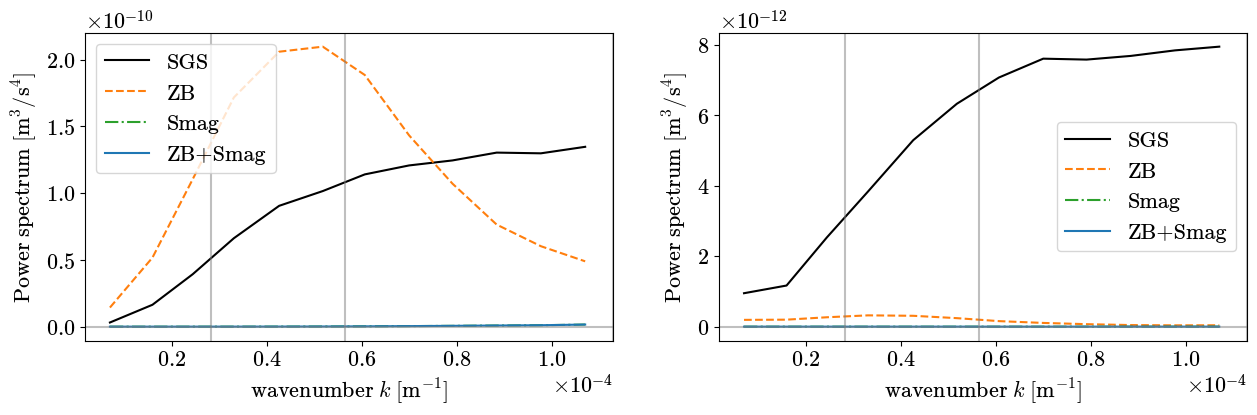

In [52]:
ds.plot_transfer('May22-FGR4-subfilter-EXP2-short-zero-R4-ZB-1.0-Cs-0.01')

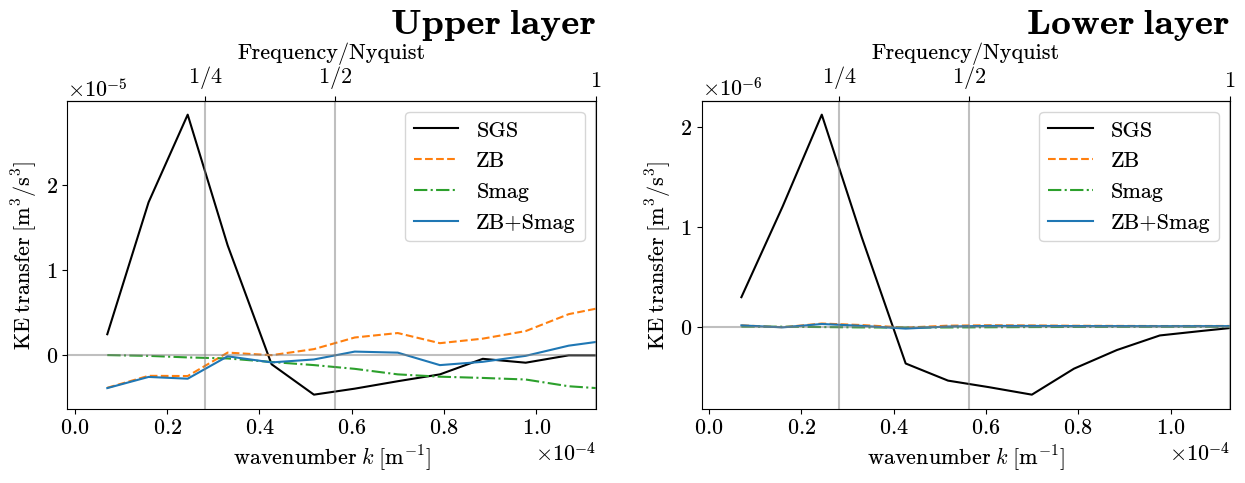

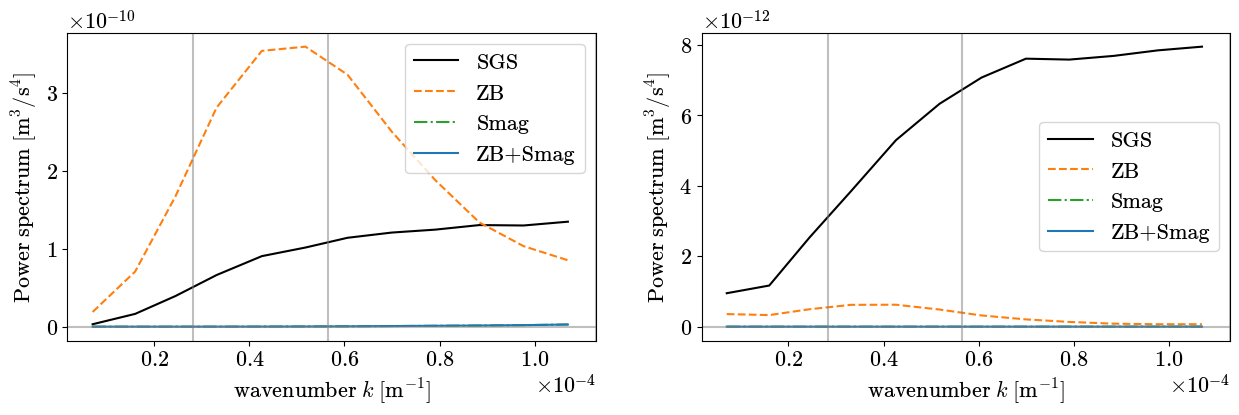

In [53]:
ds.plot_transfer('May22-FGR4-subgrid-EXP2-short-zero-R4-ZB-1.0-Cs-0.01')